In [1]:
pip install pquality

You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pquality

  Using cached pquality-0.0.9-py3-none-any.whl (4.3 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'infomap', 'leidenalg'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'leidenalg'}


In [2]:
path = "/Users/damon/Desktop/Dessertion/1-Data Collection/edges.csv"

In [3]:
path_graph = "/Users/damon/Desktop/Dessertion/2-Network Analysis/"

In [11]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [5]:
community_path = "/Users/damon/Desktop/Dessertion/3-Community Discovery/"

In [6]:
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Size", fontsize=fontsize)
    plt.ylabel("Internal Edge Density", fontsize=fontsize)
    plt.title(title + " Scatter Plot", fontsize=fontsize)
    plt.legend(labels,fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [7]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [8]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

In [9]:
pip install graph_tools

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install spicy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import graph_tool.all as gt
import itertools  
import collections  
import matplotlib  
import math
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [12]:
print(nx.info(G))

Graph with 2041 nodes and 6879 edges


In [16]:
network_data = pd.read_csv(path)
edge_cols = ['Count']
graph = nx.convert_matrix.from_pandas_edgelist(network_data,
                                               source = 'Source',
                                               target = 'Target',
                                               edge_attr = edge_cols)

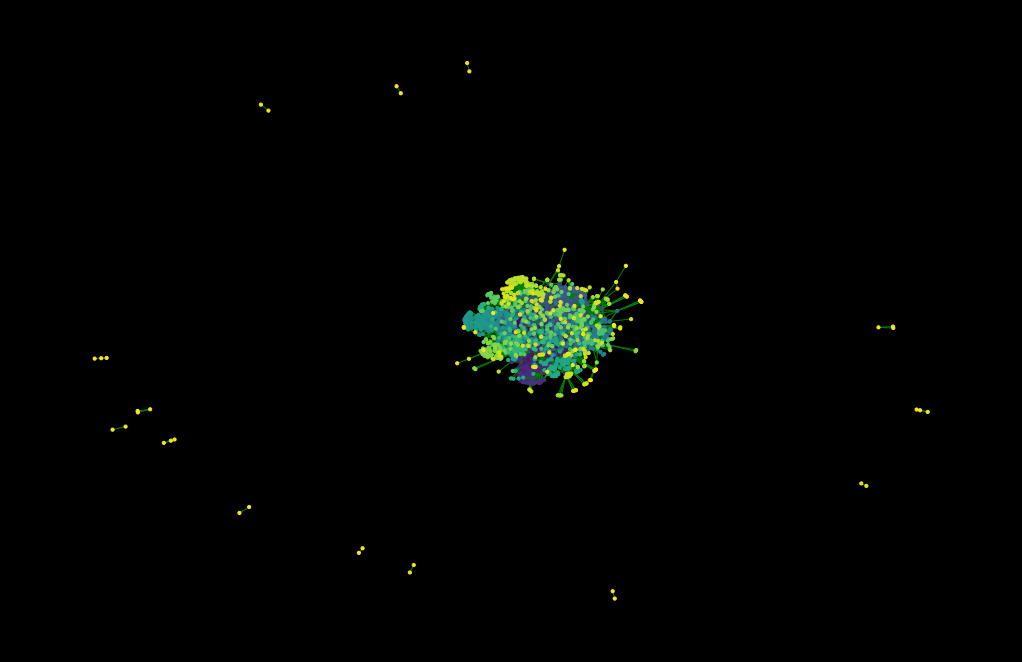

In [17]:
fig = plt.figure(figsize = (14, 9))
colors = np.linspace(0, 1, len(graph.nodes))
nx.draw(graph, 
        node_size  = 10,
        node_color = colors,
        edge_color = 'g')
fig.set_facecolor('k')

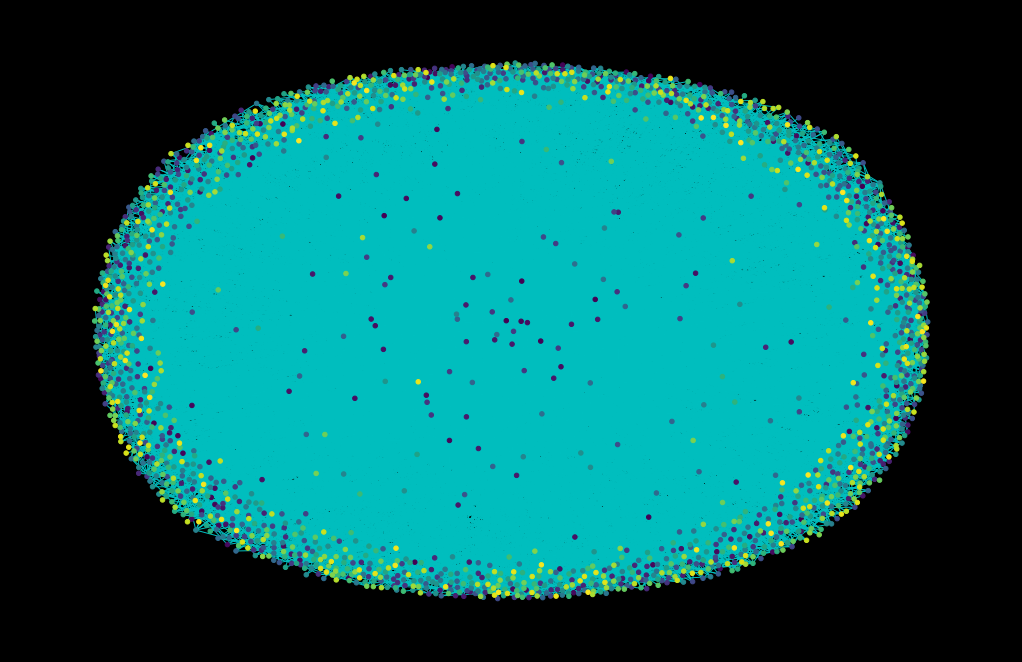

In [18]:
colors = np.linspace(0, 1, len(graph.nodes))

k = 1.0
layout = nx.spring_layout(graph, k = k)

fig = plt.figure(figsize = (14, 9))

nx.draw(graph,
        node_size = 20,
        node_color = colors,
        pos = layout, 
        edge_color = 'c')
fig.set_facecolor('k')

# 1 - Louvain
Parametri ottimizzati con grid_search

In [19]:
res_df = {"randomize": [], "resolution":[], "AID": [], "IED": [], "Conductance":[], "Modularity": [], "N_Community": [], "Max_Dim_Community": []}

In [20]:
for j in [True, False]:
    for i in [x/10 for x in range(0, 10)]:   
        print(f"> Louvain opt for resolution = {i} and randomize = {j}")
        
        res_df["randomize"].append(j)
        res_df["resolution"].append(i)
        
        louvain_coms = cdlib.algorithms.louvain(G, weight = "Count", resolution=i, randomize=j)
        res_df["AID"].append(louvain_coms.average_internal_degree().score)
        res_df["IED"].append(louvain_coms.internal_edge_density().score)
        res_df["Conductance"].append(louvain_coms.conductance().score)
        res_df["Modularity"].append(louvain_coms.newman_girvan_modularity().score)
        res_df["N_Community"].append(len(louvain_coms.communities))
        max_com_len = 0
        for com in louvain_coms.communities:
            if len(com) > max_com_len:
                max_com_len = len(com)
        res_df["Max_Dim_Community"].append(max_com_len)
        
        print("************ ------------------ *******")
final_df = pd.DataFrame(res_df)
final_df.to_csv(community_path+"louvain_grid_result.csv", index=False)

> Louvain opt for resolution = 0.0 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.1 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.2 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.3 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.4 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.5 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.6 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.7 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.8 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.9 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.0 and r

In [21]:
final_df = pd.read_csv(community_path+"louvain_grid_result.csv")

In [22]:
final_df.loc[[1, 2, 3, 4, 5, 6, 7, 8, 9]]

randomize  resolution       AID       IED  Conductance  Modularity  \
1       True         0.1  1.049181  0.485077     0.741221    0.428725   
2       True         0.2  2.061344  0.841818     0.460967    0.574787   
3       True         0.3  2.081692  0.848801     0.456096    0.571241   
4       True         0.4  2.086957  0.857465     0.444230    0.592198   
5       True         0.5  2.083485  0.851988     0.453124    0.585231   
6       True         0.6  3.105062  0.528984     0.154243    0.648920   
7       True         0.7  3.046170  0.582672     0.116348    0.656295   
8       True         0.8  3.085043  0.595528     0.117659    0.660611   
9       True         0.9  3.011820  0.561699     0.123107    0.661095   

   N_Community  Max_Dim_Community  
1          515                190  
2          222                270  
3          225                279  
4          205                270  
5          211                260  
6           33                447  
7           28                409  
8           29                299  
9           28                315

Ottimizzazione con randomsearch

In [23]:
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
parameters = [resolution]

In [24]:
louvain_coms, scoring = ensemble.grid_search(graph=G, method=algorithms.louvain,
                                                       parameters=parameters,
                                                       quality_score=evaluation.newman_girvan_modularity, aggregate=max)

In [25]:
print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(louvain_coms.communities, louvain_coms.method_parameters, scoring))

Communities:
 [['assembly', 'optimization', 'x86-64', 'cpu-architecture', 'simd', 'c++', 'rounding', 'c', 'clang', 'gcc', 'vectorization', 'compiler-optimization', 'undefined-behavior', 'cpu-cache', 'type-conversion', 'micro-optimization', 'bit-manipulation', '6800', 'x86', 'arm64', 'nasm', 'calling-convention', 'avx', 'abi', 'sse', 'cpu-registers', 'performance', 'benchmarking', 'branch-prediction', 'data-structures', 'numba', 'intrinsics', 'swap', 'prefetch', 'copy-elision', 'rust', 'floating-point', 'atomic', 'stack-memory', 'visual-c++', 'stdoptional', 'false-sharing', 'literals', 'integer', 'avx2', 'logical-and', 'string', 'reference', 'string-concatenation', 'language-lawyer', 'arrays', 'julia', 'async-await', 'game-theory', 'constants', 'asynchronous', 'object', 'hashmap', 'multiple-inheritance', 'format', 'number-formatting', 'gcc-warning', 'compilation', 'hex-editors', 'random', 'c++20', 'lambda', 'templates', 'std-ranges', 'zero-copy', 'rvalue', 'lvalue', 'pointers', 'clang-t

In [26]:
louvain_coms = cdlib.algorithms.louvain(G, weight = "Count", resolution=0.9)

In [27]:
with open(community_path+'louvain.pickle', 'wb') as f:
    pickle.dump(louvain_coms, f)

In [28]:
print(print_bold_str("Average Internal Degree:"), louvain_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), louvain_coms.internal_edge_density())
print(print_bold_str("Conductance:"), louvain_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), louvain_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), louvain_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), louvain_coms.modularity_density())
print(print_bold_str("Z Modularity:"), louvain_coms.z_modularity())
print(print_bold_str("Triangle Partecipation Ratio:"), louvain_coms.triangle_participation_ratio())

print(print_bold_str("N_Community:"), len(louvain_coms.communities))

max_com_len = 0
for com in louvain_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)    

Average Internal Degree: FitnessResult(min=1.0, max=6.692041522491349, score=3.0694249165491985, std=1.8401151641631075)
Internal Edge Density: FitnessResult(min=0.01634115682632596, max=1.0, score=0.5743638840614312, std=0.46760112220573263)
Conductance: FitnessResult(min=0.0, max=0.30612244897959184, score=0.11568683926350706, std=0.12320165597469857)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.6721168543092244, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.6607697685244797, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=65.61155212714947, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=2.074114016949403, std=None)
Triangle Partecipation Ratio: FitnessResult(min=0.0, max=1.0, score=0.6368405405447939, std=0.4405902105107023)
N_Community: 28
Max_Dim_Community: 327


In [29]:
louvain_tuple = [tuple(x) for x in louvain_coms.communities]

{'327': 1, '289': 1, '284': 1, '227': 1, '157': 1, '156': 1, '141': 1, '123': 1, '116': 1, '87': 1, '58': 1, '30': 1, '8': 1, '5': 1, '3': 5, '2': 9}


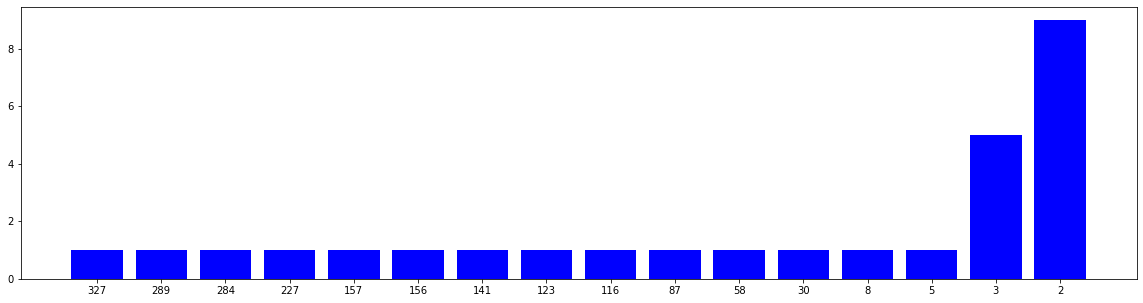

In [30]:
# Analizziamo la cardinalità delle communities
plot_communities_dimentions(louvain_tuple)

In [31]:
results = pquality.pquality_summary(G, louvain_tuple)
results['Indexes']

min         max         avg         std
Index                                                         
Internal Density  0.016341    1.000000    0.574364    0.467601
Edges inside      1.000000  967.000000  190.500000  291.819599
Average Degree    1.000000    6.692042    3.069425    1.840115
FOMD              0.000000    0.492355    0.170071    0.194787
TPR               0.000000    1.000000    0.636841    0.440590
Expansion         0.000000    2.068966    0.726155    0.787955
Cut Ratio         0.000000    0.001043    0.000385    0.000419
Conductance       0.000000    0.306122    0.115687    0.123202
Normalized Cut    0.000000    0.318751    0.124230    0.131837
Maximum-ODF       0.000000   92.000000   19.571429   27.406241
Average-ODF       0.000000    2.068966    0.726155    0.787955
Flake-ODF         0.000000    0.092199    0.020486    0.029070

In [32]:
results['Modularity']

value
Index                           
Modularity (no overlap)  0.66077

# 2 - Label Propagation

In [33]:
labelprop_coms = algorithms.label_propagation(G)

In [34]:
print(print_bold_str("Average Internal Degree:"), labelprop_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), labelprop_coms.internal_edge_density())
print(print_bold_str("Conductance:"), labelprop_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), labelprop_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), labelprop_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), labelprop_coms.modularity_density())
print(print_bold_str("Z Modularity:"), labelprop_coms.z_modularity())
print(print_bold_str("Triangle Partecipation Ratio:"), labelprop_coms.triangle_participation_ratio())

print(print_bold_str("N_Community:"), len(labelprop_coms.communities))

max_com_len = 0
for com in labelprop_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)        

Average Internal Degree: FitnessResult(min=1.0, max=6.588235294117647, score=2.131673150260504, std=1.1693032906623453)
Internal Edge Density: FitnessResult(min=0.016791044776119403, max=1.0, score=0.8007326292266552, std=0.2993008342141027)
Conductance: FitnessResult(min=0.0, max=0.7777777777777778, score=0.43113793883034107, std=0.17950026275012243)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.6079649914915801, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.5765645165288447, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=77.19661522594691, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=1.8813507940352403, std=None)
Triangle Partecipation Ratio: FitnessResult(min=0.0, max=1.0, score=0.5750269774217274, std=0.45686718936079307)
N_Community: 177
Max_Dim_Community: 336


In [35]:
with open(community_path+'labelprop.pickle', 'wb') as f:
    pickle.dump(labelprop_coms, f)

In [36]:
labelprop_tuple = [tuple(x) for x in labelprop_coms.communities]

{'336': 1, '294': 1, '209': 1, '204': 1, '94': 1, '63': 1, '53': 1, '44': 1, '30': 1, '22': 1, '20': 1, '18': 1, '16': 1, '14': 3, '12': 3, '11': 2, '10': 1, '9': 4, '8': 6, '7': 4, '6': 4, '5': 8, '4': 26, '3': 42, '2': 61}


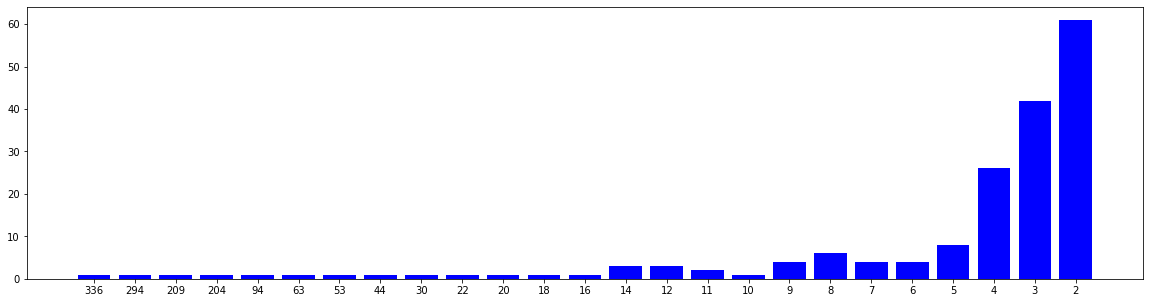

In [37]:
plot_communities_dimentions(labelprop_tuple)

In [38]:
results = pquality.pquality_summary(G, labelprop_tuple)
results['Indexes']

min         max        avg         std
Index                                                        
Internal Density  0.016791    1.000000   0.800733    0.299301
Edges inside      1.000000  945.000000  26.485876  119.379569
Average Degree    1.000000    6.588235   2.131673    1.169303
FOMD              0.000000    0.500000   0.094877    0.146057
TPR               0.000000    1.000000   0.575027    0.456867
Expansion         0.000000    5.500000   1.695534    0.945221
Cut Ratio         0.000000    0.002711   0.000837    0.000468
Conductance       0.000000    0.777778   0.431138    0.179500
Normalized Cut    0.000000    0.778286   0.433015    0.178755
Maximum-ODF       0.000000  132.000000   7.451977   18.788721
Average-ODF       0.000000    5.500000   1.695534    0.945221
Flake-ODF         0.000000    1.000000   0.201706    0.311236

In [39]:
results['Modularity']

value
Index                            
Modularity (no overlap)  0.576565

# 3 - Demon
Parametri ottimizzati con grid_search

In [40]:
eps = ensemble.Parameter(name="epsilon", start=0.1, end=0.6, step=0.1)
size = ensemble.Parameter(name="min_com_size", start=3, end=5,step=1)

In [41]:
coms_demon, scoring = ensemble.random_search(graph=G, method=algorithms.demon,
                                                       parameters=[eps, size],
                                                       quality_score=evaluation.newman_girvan_modularity,
                                                        aggregate=max)

print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(coms_demon.communities, coms_demon.method_parameters, scoring))

Communities:
 [['3d', '6800', 'abi', 'adb', 'agda', 'aggregate-initialization', 'aiohttp', 'algorithm', 'allocator', 'ambiguity', 'ambiguous', 'ambiguous-call', 'android', 'android-11', 'android-binding-adapter', 'android-build', 'android-dialog', 'android-dialogfragment', 'android-inflate', 'android-jetpack-compose', 'android-studio', 'android-studio-bumblebee', 'android-update-app', 'argument-dependent-lookup', 'arm', 'arm64', 'arrays', 'assembly', 'async-await', 'asynchronous', 'atomic', 'attributedstring', 'auto', 'binary-search-tree', 'binary-tree', 'bindingadapter', 'bit-fields', 'bit-manipulation', 'bit-packing', 'boolean', 'boost', 'boost-asio', 'c', 'c#', 'c#-11.0', 'c++', 'c++-concepts', 'c++-coroutine', 'c++-experimental', 'c++-modules', 'c++-standard-library', 'c++-templates', 'c++11', 'c++14', 'c++17', 'c++20', 'c++23', 'c-preprocessor', 'c11', 'calling-convention', 'catamorphism', 'category-theory', 'char', 'char-pointer', 'chrono', 'clang', 'clang++', 'clang-format', 'cl

In [42]:
print(print_bold_str("Average Internal Degree:"), coms_demon.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), coms_demon.internal_edge_density())
print(print_bold_str("Conductance:"), coms_demon.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), coms_demon.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), coms_demon.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), coms_demon.modularity_density())
print(print_bold_str("Z Modularity:"), coms_demon.z_modularity())


Average Internal Degree: FitnessResult(min=2.5, max=8.477611940298507, score=5.063907708656527, std=1.6043824825672888)
Internal Edge Density: FitnessResult(min=0.022641509433962263, max=1.0, score=0.5226985499683136, std=0.3978984153290549)
Conductance: FitnessResult(min=0.16666666666666666, max=0.9658119658119658, score=0.7131813065192913, std=0.18143376862433783)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=3.2217580081047306, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.2545394461161251, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=-2630.81123709195, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=nan, std=None)


In [43]:
print(print_bold_str("N_Community:"), len(coms_demon.communities))

max_com_len = 0
for com in coms_demon.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)        

N_Community: 157
Max_Dim_Community: 371


In [44]:
with open(community_path+'demon.pickle', 'wb') as f:
    pickle.dump(coms_demon, f)

In [45]:
demon_tuple = [tuple(x) for x in coms_demon.communities]

In [46]:
print("Numero di communities: ", len(demon_tuple))

Numero di communities:  157


{'371': 1, '335': 1, '322': 1, '280': 1, '252': 1, '206': 1, '180': 1, '179': 1, '164': 1, '153': 1, '138': 1, '137': 2, '136': 1, '135': 1, '129': 2, '124': 1, '121': 1, '118': 1, '113': 1, '112': 1, '92': 1, '90': 1, '87': 1, '85': 1, '82': 2, '81': 1, '74': 1, '73': 1, '71': 1, '70': 1, '69': 1, '66': 1, '64': 1, '59': 1, '58': 1, '57': 1, '56': 2, '53': 1, '50': 2, '49': 1, '47': 2, '45': 2, '40': 1, '35': 1, '34': 1, '32': 1, '31': 1, '30': 1, '28': 1, '27': 1, '21': 4, '20': 2, '19': 3, '18': 2, '17': 4, '16': 1, '15': 3, '14': 3, '13': 2, '12': 3, '11': 1, '10': 2, '9': 2, '8': 1, '7': 3, '6': 4, '5': 33, '4': 27}


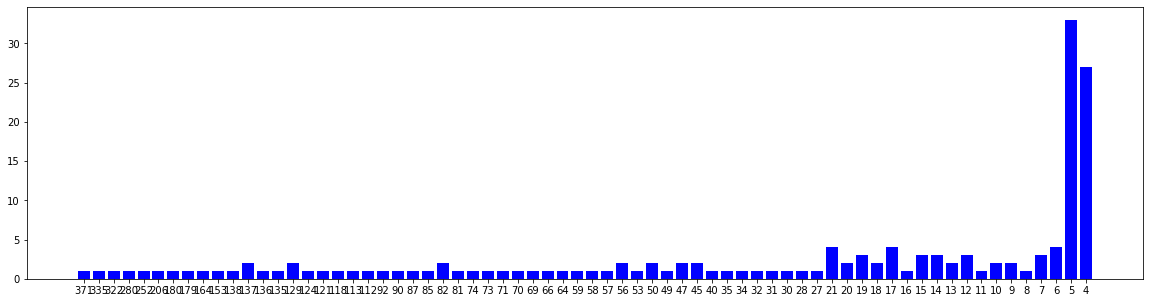

In [47]:
plot_communities_dimentions(demon_tuple)

In [48]:
results = pquality.pquality_summary(G, demon_tuple)
results['Indexes']

min          max         avg         std
Index                                                          
Internal Density  0.022642     1.000000    0.522699    0.397898
Edges inside      5.000000  1554.000000  151.477707  265.735863
Average Degree    2.500000     8.477612    5.063908    1.604382
FOMD              0.000000     0.500000    0.251929    0.194701
TPR               1.000000     1.000000    1.000000    0.000000
Expansion         0.800000    84.750000   21.820667   19.186236
Cut Ratio         0.000393     0.041605    0.010841    0.009379
Conductance       0.166667     0.965812    0.713181    0.181434
Normalized Cut    0.166958     0.989880    0.754525    0.180740
Maximum-ODF       4.000000   339.000000  194.191083  120.606701
Average-ODF       0.800000    84.750000   21.820667   19.186236
Flake-ODF         0.000000     0.800000    0.292180    0.133196

In [49]:
results['Modularity']

value
Index                            
Modularity (no overlap)  0.254539

# 4 - GM

In [50]:
GM_coms = algorithms.greedy_modularity(G, weight = "Count") 

In [51]:
print(print_bold_str("Average Internal Degree:"), GM_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), GM_coms.internal_edge_density())
print(print_bold_str("Conductance:"), GM_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), GM_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), GM_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), GM_coms.modularity_density())
print(print_bold_str("Z Modularity:"), GM_coms.z_modularity())

Average Internal Degree: FitnessResult(min=1.0, max=6.62, score=3.0376080345362637, std=1.7737241625831932)
Internal Edge Density: FitnessResult(min=0.013207728079006664, max=1.0, score=0.5962993187957314, std=0.45799453046797456)
Conductance: FitnessResult(min=0.0, max=0.38823529411764707, score=0.12288811520508026, std=0.13138520134215548)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.6586253862132102, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.648735707109293, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=66.36225698952853, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=1.8825680676506906, std=None)


In [52]:
print(print_bold_str("N_Community:"), len(GM_coms.communities))

max_com_len = 0
for com in GM_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)   

N_Community: 29
Max_Dim_Community: 409


In [53]:
with open(community_path+'GM.pickle', 'wb') as f:
    pickle.dump(GM_coms, f)

In [54]:
GM_tuple = [tuple(x) for x in GM_coms.communities]

{'409': 1, '311': 1, '306': 1, '300': 1, '209': 1, '142': 1, '121': 1, '58': 1, '40': 1, '36': 1, '30': 1, '28': 1, '8': 1, '5': 2, '3': 5, '2': 9}


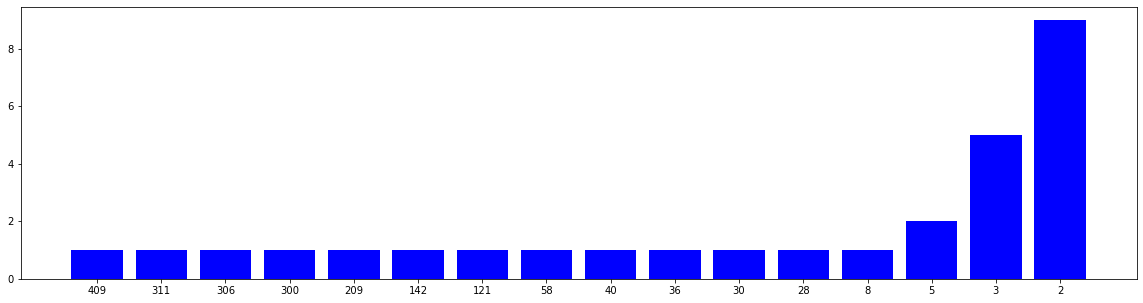

In [55]:
plot_communities_dimentions(GM_tuple)

In [56]:
results = pquality.pquality_summary(G, GM_tuple)
results['Indexes']

min          max         avg         std
Index                                                          
Internal Density  0.013208     1.000000    0.596299    0.457995
Edges inside      1.000000  1102.000000  186.551724  334.043419
Average Degree    1.000000     6.620000    3.037608    1.773724
FOMD              0.000000     0.408451    0.135593    0.162071
TPR               0.000000     1.000000    0.644144    0.436204
Expansion         0.000000     2.200000    0.749254    0.816029
Cut Ratio         0.000000     0.001123    0.000395    0.000428
Conductance       0.000000     0.388235    0.122888    0.131385
Normalized Cut    0.000000     0.393046    0.130860    0.138239
Maximum-ODF       0.000000    89.000000   17.310345   24.970470
Average-ODF       0.000000     2.200000    0.749254    0.816029
Flake-ODF         0.000000     0.125000    0.027458    0.040850

In [57]:
results['Modularity']

value
Index                            
Modularity (no overlap)  0.648736

# 5 -  CONFRONTI
1) Lettura

In [58]:
with open(community_path+'louvain.pickle', 'rb') as f:
    louvain_coms = pickle.load(f)
with open(community_path+'labelprop.pickle', 'rb') as f:
    labelprop_coms = pickle.load(f)
with open(community_path+'demon.pickle', 'rb') as f:
    demon_coms = pickle.load(f)
with open(community_path+'GM.pickle', 'rb') as f:
    GM_coms = pickle.load(f)

In [59]:
def covg_overlap(G, community, name):
    print(f'{name} coverage:', community.node_coverage)
    print(f'{name} overlap:', community.overlap) 
    print(f'{name} avg degree:', evaluation.average_internal_degree(G, community))
    print("*******")

In [60]:
covg_overlap(G, louvain_coms, "Louvain")
covg_overlap(G, labelprop_coms, "LabelPropagation")
covg_overlap(G, demon_coms, "Demon")
covg_overlap(G, GM_coms, "GM")

Louvain coverage: 1.0
Louvain overlap: False
Louvain avg degree: FitnessResult(min=1.0, max=6.692041522491349, score=3.0694249165491985, std=1.8401151641631075)
*******
LabelPropagation coverage: 1.0
LabelPropagation overlap: False
LabelPropagation avg degree: FitnessResult(min=1.0, max=6.588235294117647, score=2.131673150260504, std=1.1693032906623453)
*******
Demon coverage: 0.8745712885840274
Demon overlap: True
Demon avg degree: FitnessResult(min=2.5, max=8.477611940298507, score=5.063907708656527, std=1.6043824825672888)
*******
GM coverage: 1.0
GM overlap: False
GM avg degree: FitnessResult(min=1.0, max=6.62, score=3.0376080345362637, std=1.7737241625831932)
*******


2) Confronti

2.1) Size BoxPlot

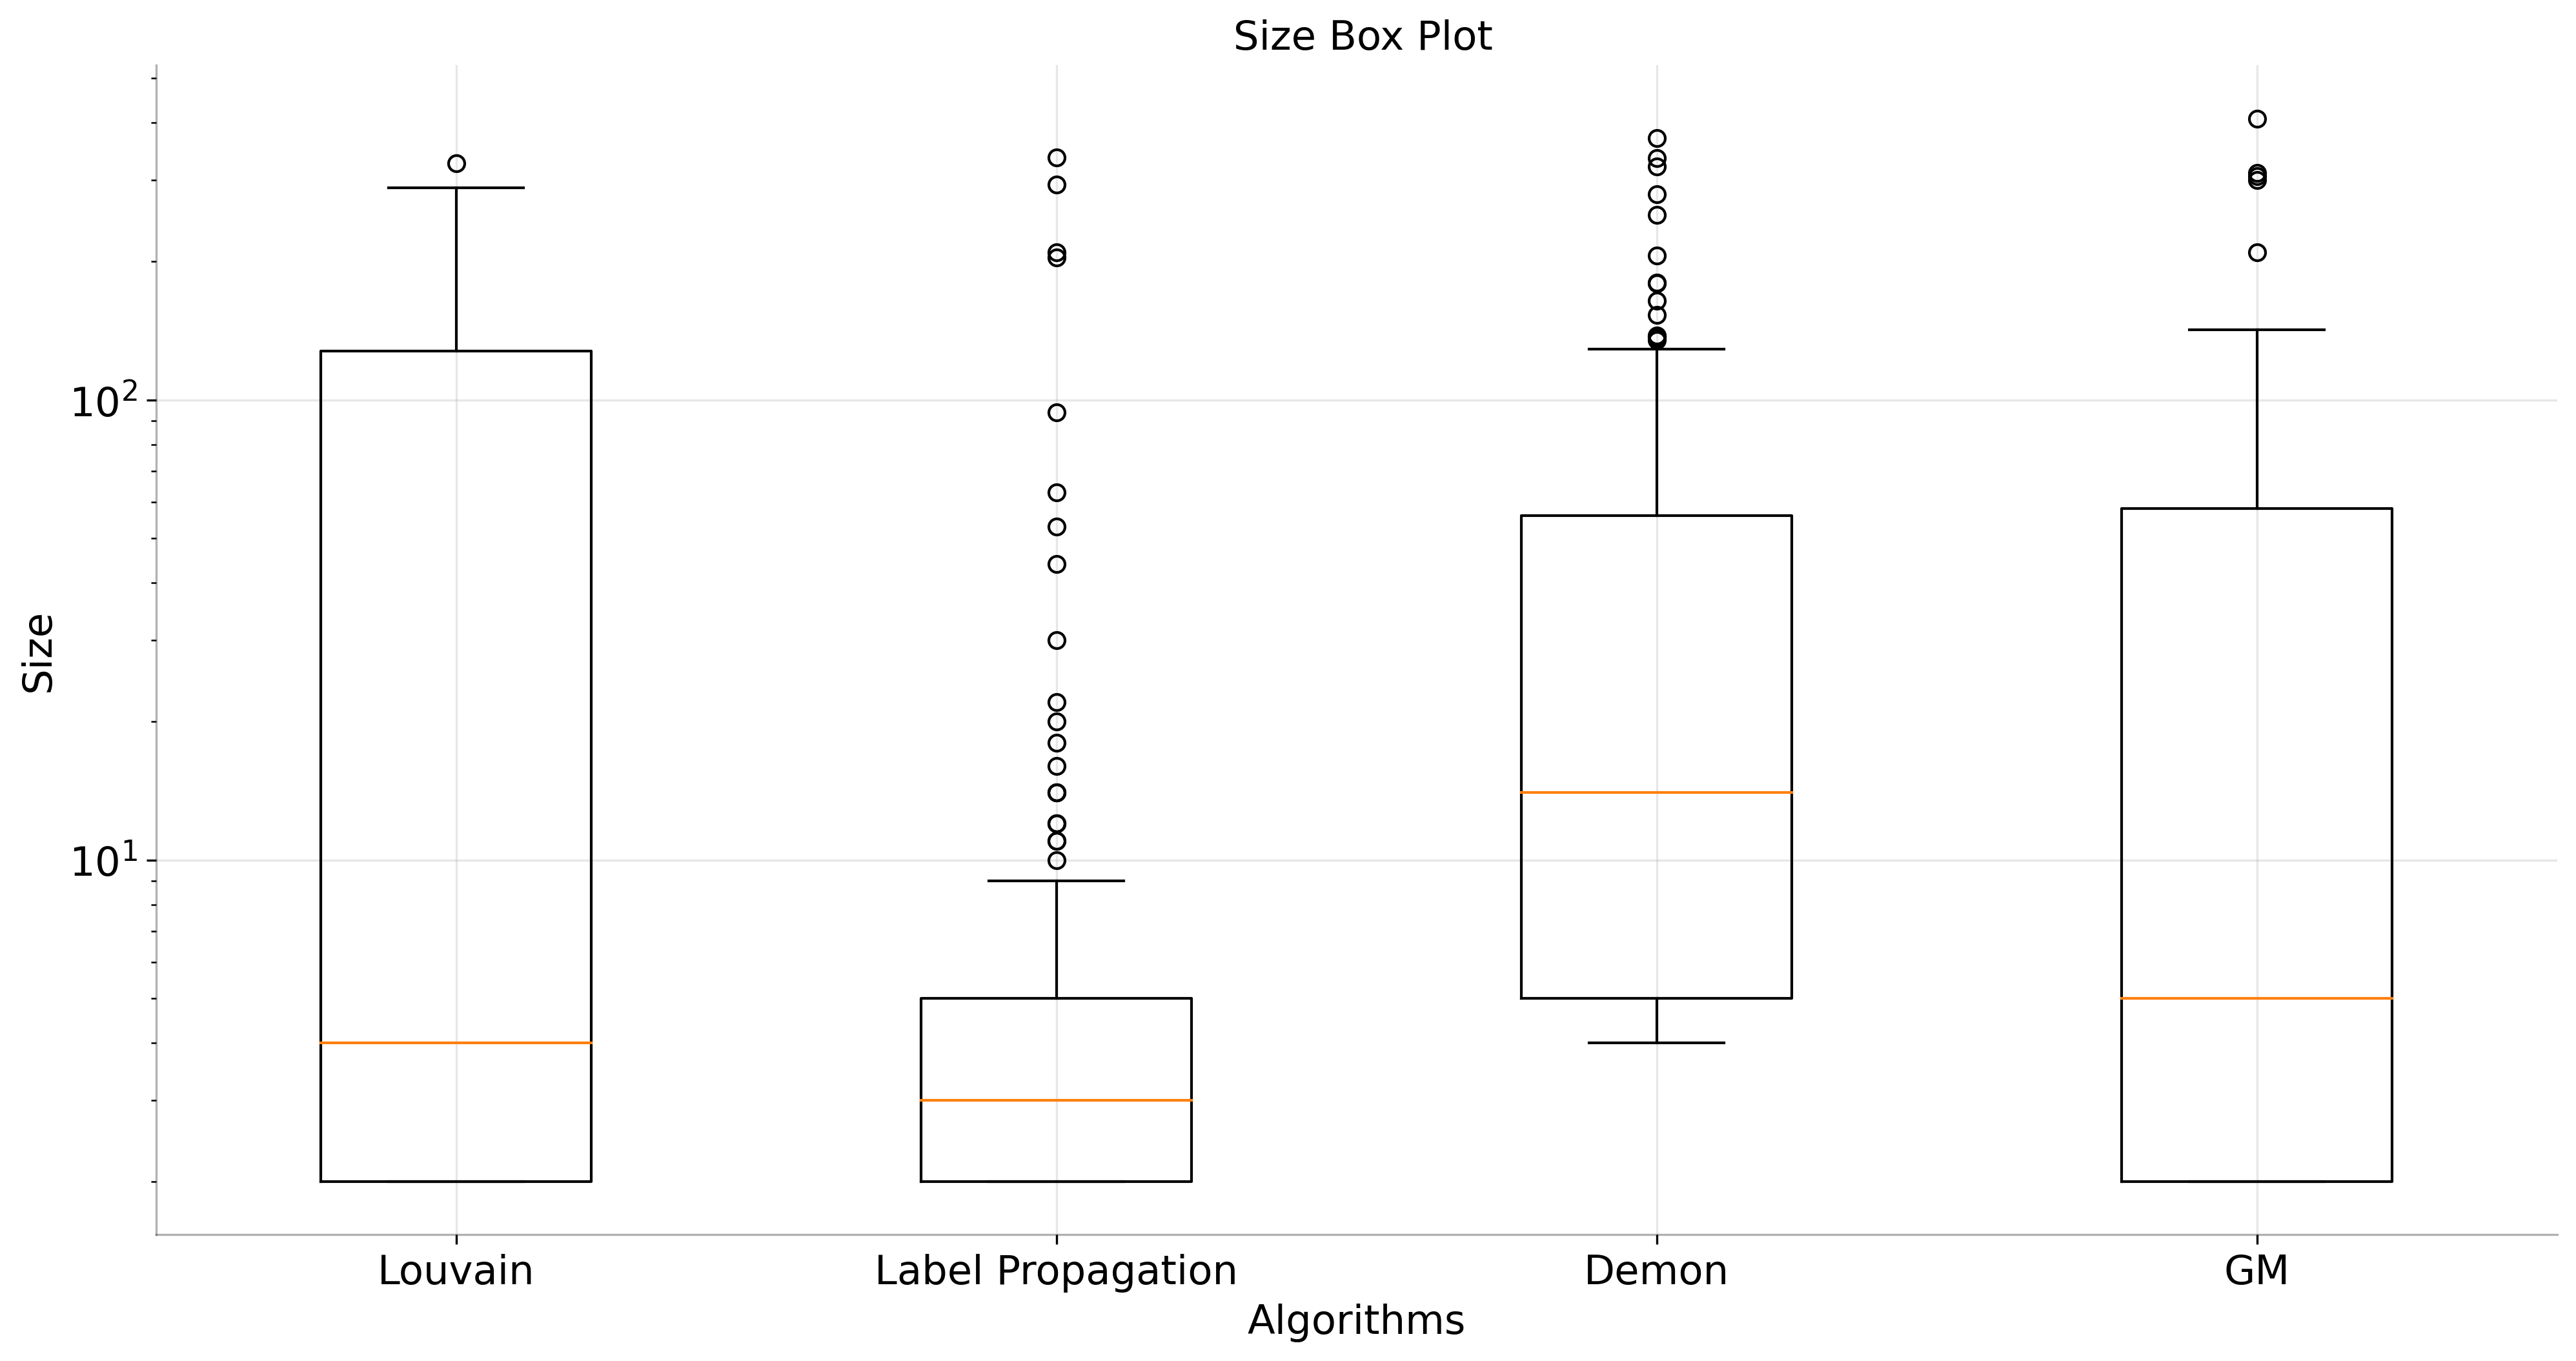

In [61]:
plot_list = [ np.array(evaluation.size(G,louvain_coms, summary=False)), 
             np.array(evaluation.size(G,labelprop_coms, summary=False)),
             np.array(evaluation.size(G,demon_coms, summary=False)),
             np.array(evaluation.size(G,GM_coms, summary=False))]
labels = ["Louvain", "Label Propagation", "Demon", "GM"]

fig = plt.figure(figsize=(16,8), dpi= 300)
ax = fig.add_subplot(111)
plt.boxplot(plot_list,labels=labels)
#plt.boxplot(x)

fontsize = 15

#plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
plt.yticks(fontsize=fontsize, alpha=1)
plt.xticks(fontsize=fontsize, alpha=1)
plt.xlabel('Algorithms', fontsize=fontsize)
plt.ylabel("Size", fontsize=fontsize)
plt.title(" Size Box Plot", fontsize=fontsize)
#plt.title(name + " in 24 hours", fontsize=fontsize)
plt.grid(axis='both', alpha=.3)
plt.yscale("log")



# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

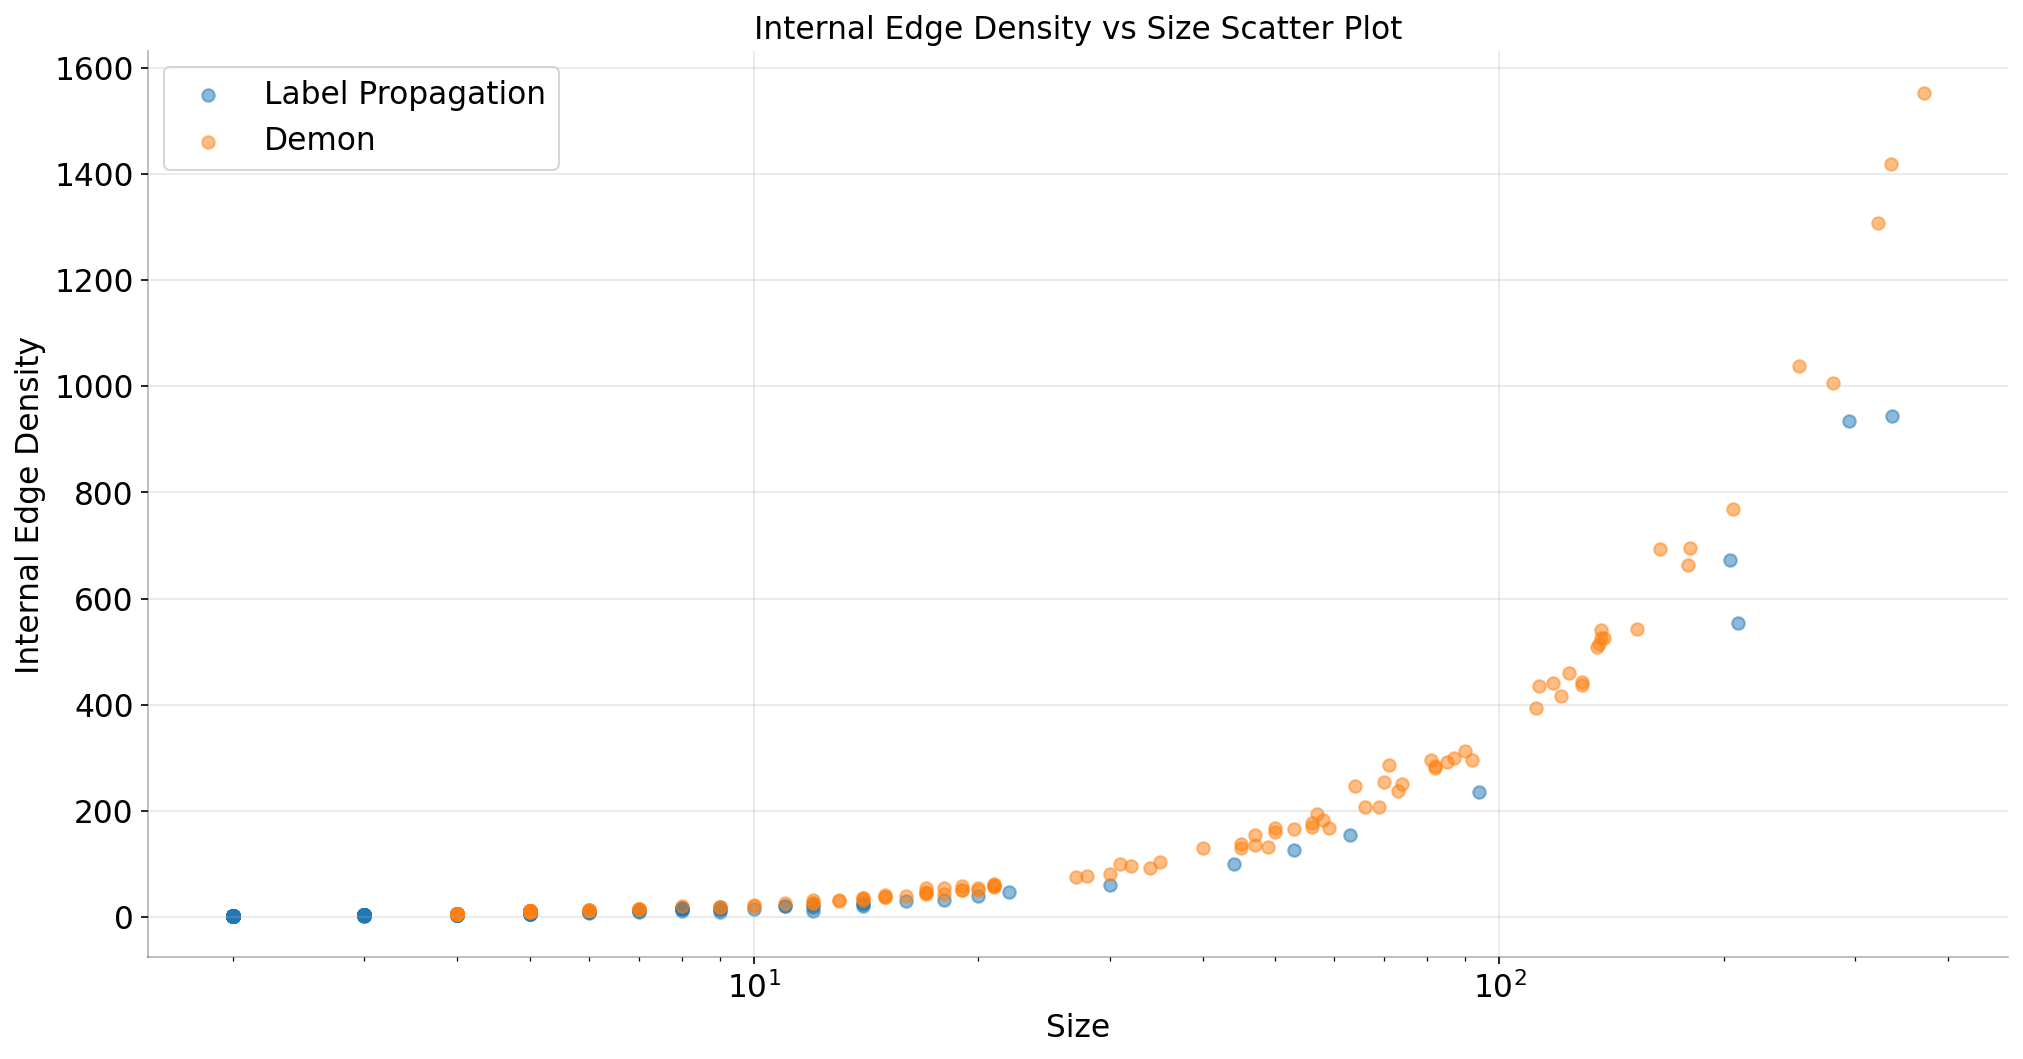

In [62]:
edge_density_ = [(np.array(evaluation.size(G,labelprop_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)),
                               "Label Propagation"),
                               (np.array(evaluation.size(G,demon_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                                "Demon")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

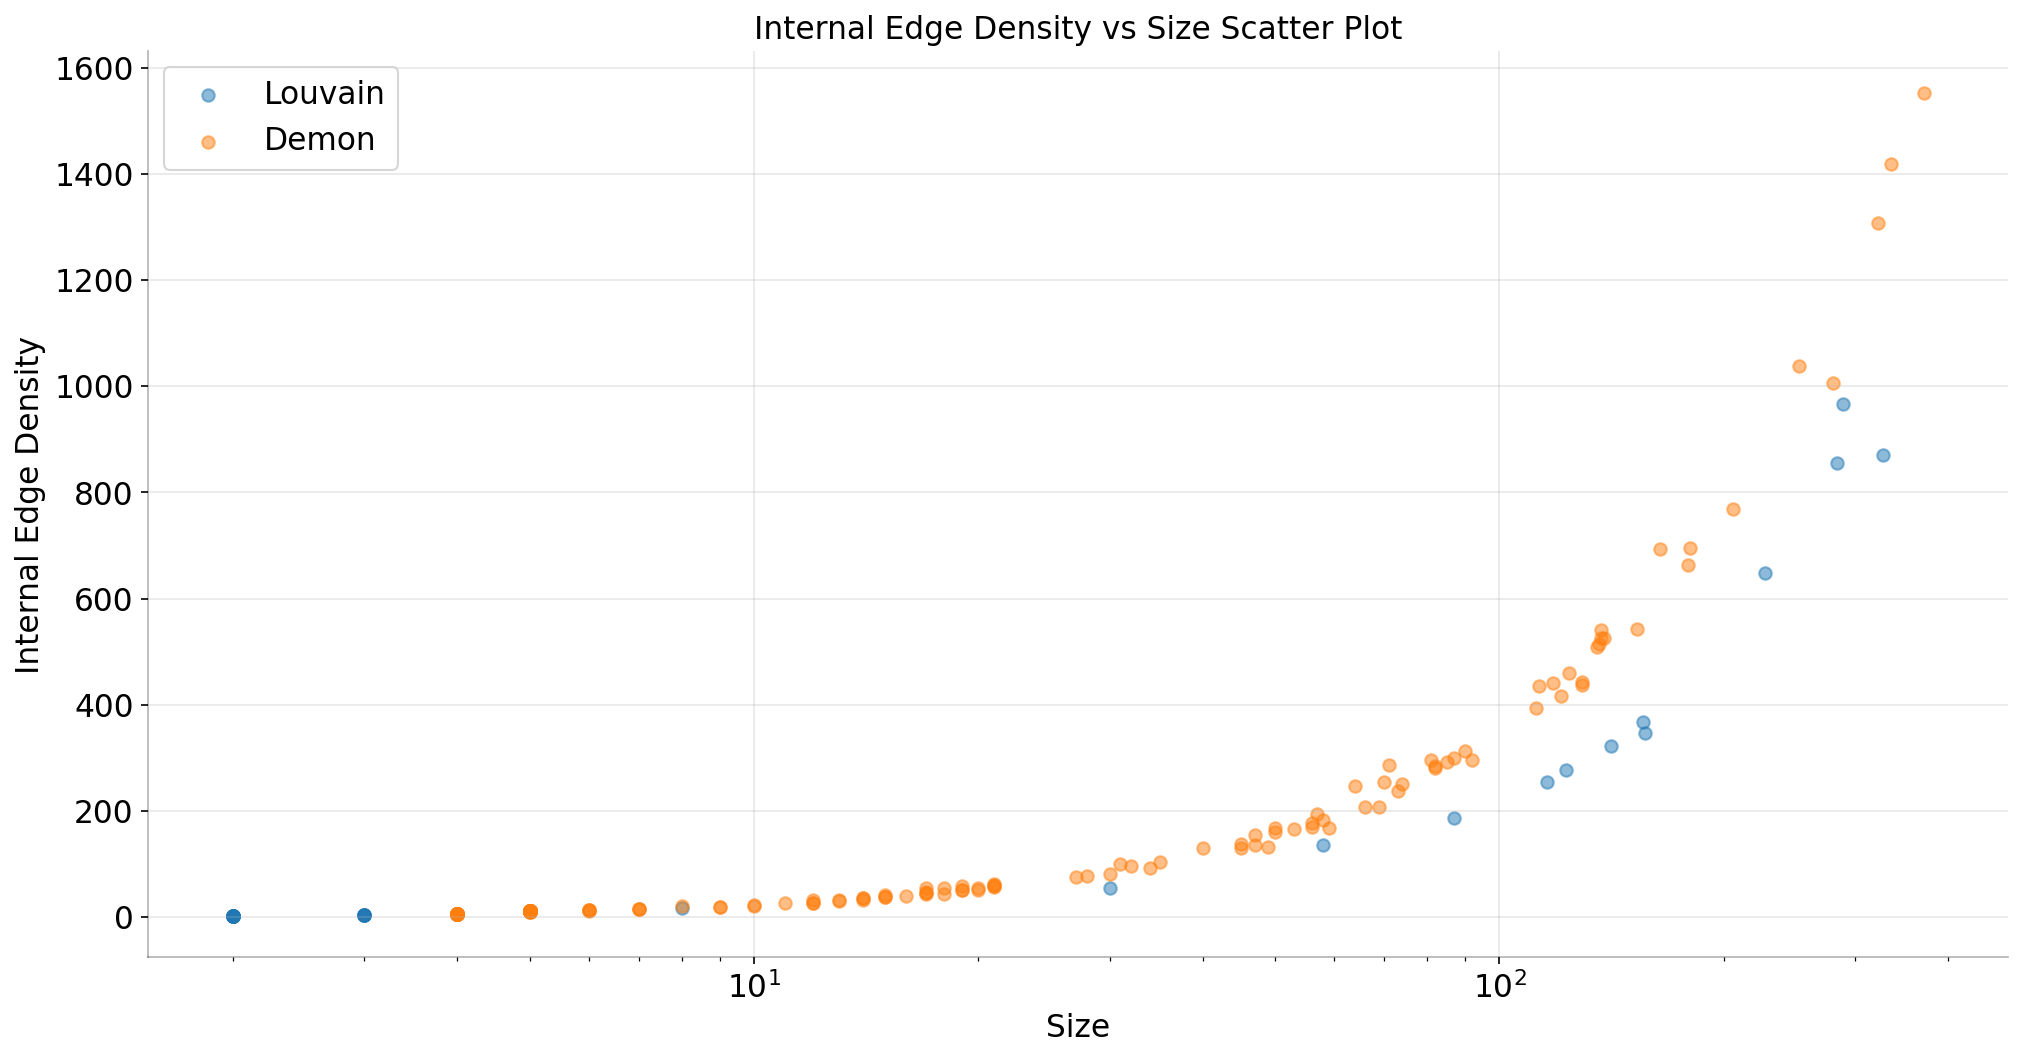

In [63]:
edge_density_= [(np.array(evaluation.size(G,louvain_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,louvain_coms, summary=False)),
                               "Louvain"),
                               (np.array(evaluation.size(G,demon_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                                "Demon")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

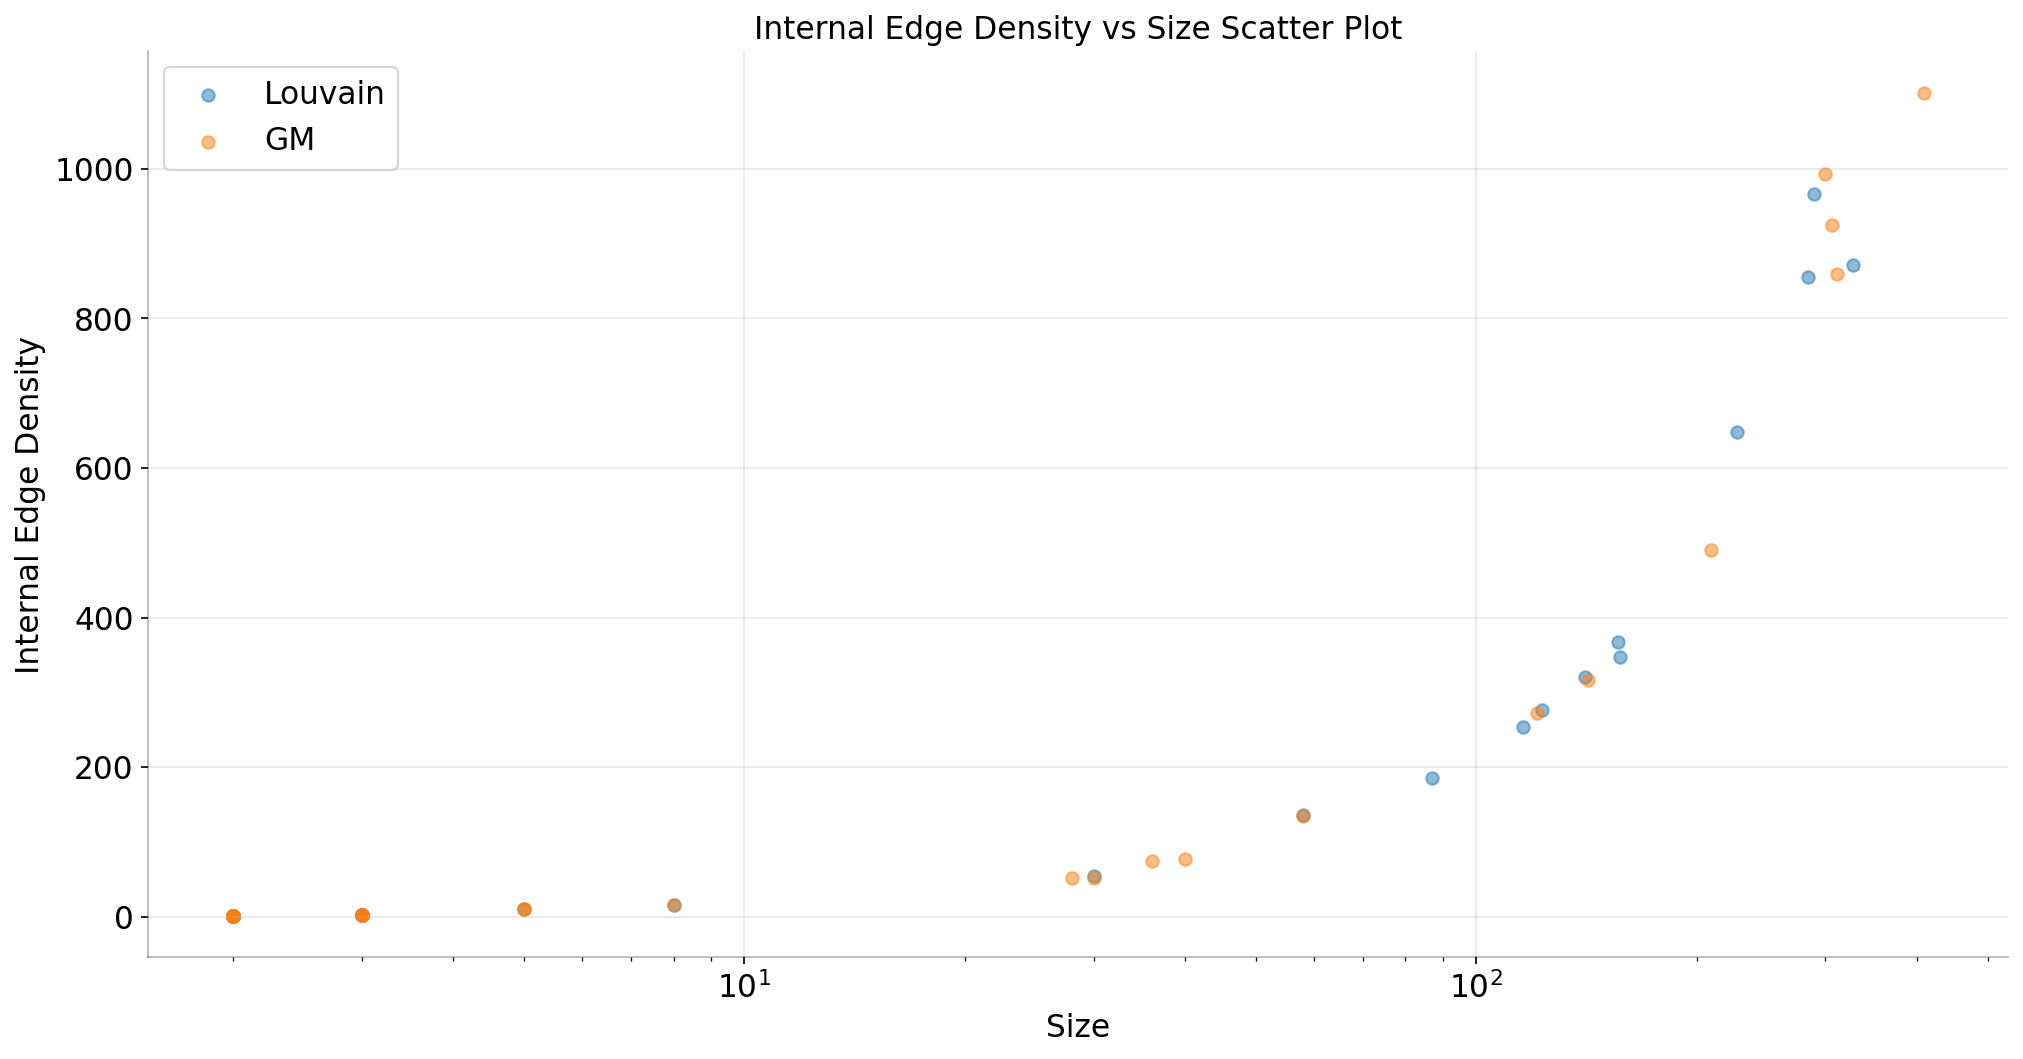

In [64]:
edge_density_= [(np.array(evaluation.size(G,louvain_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,louvain_coms, summary=False)),
                               "Louvain"),
                               (np.array(evaluation.size(G,GM_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,GM_coms, summary=False)),
                                "GM")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

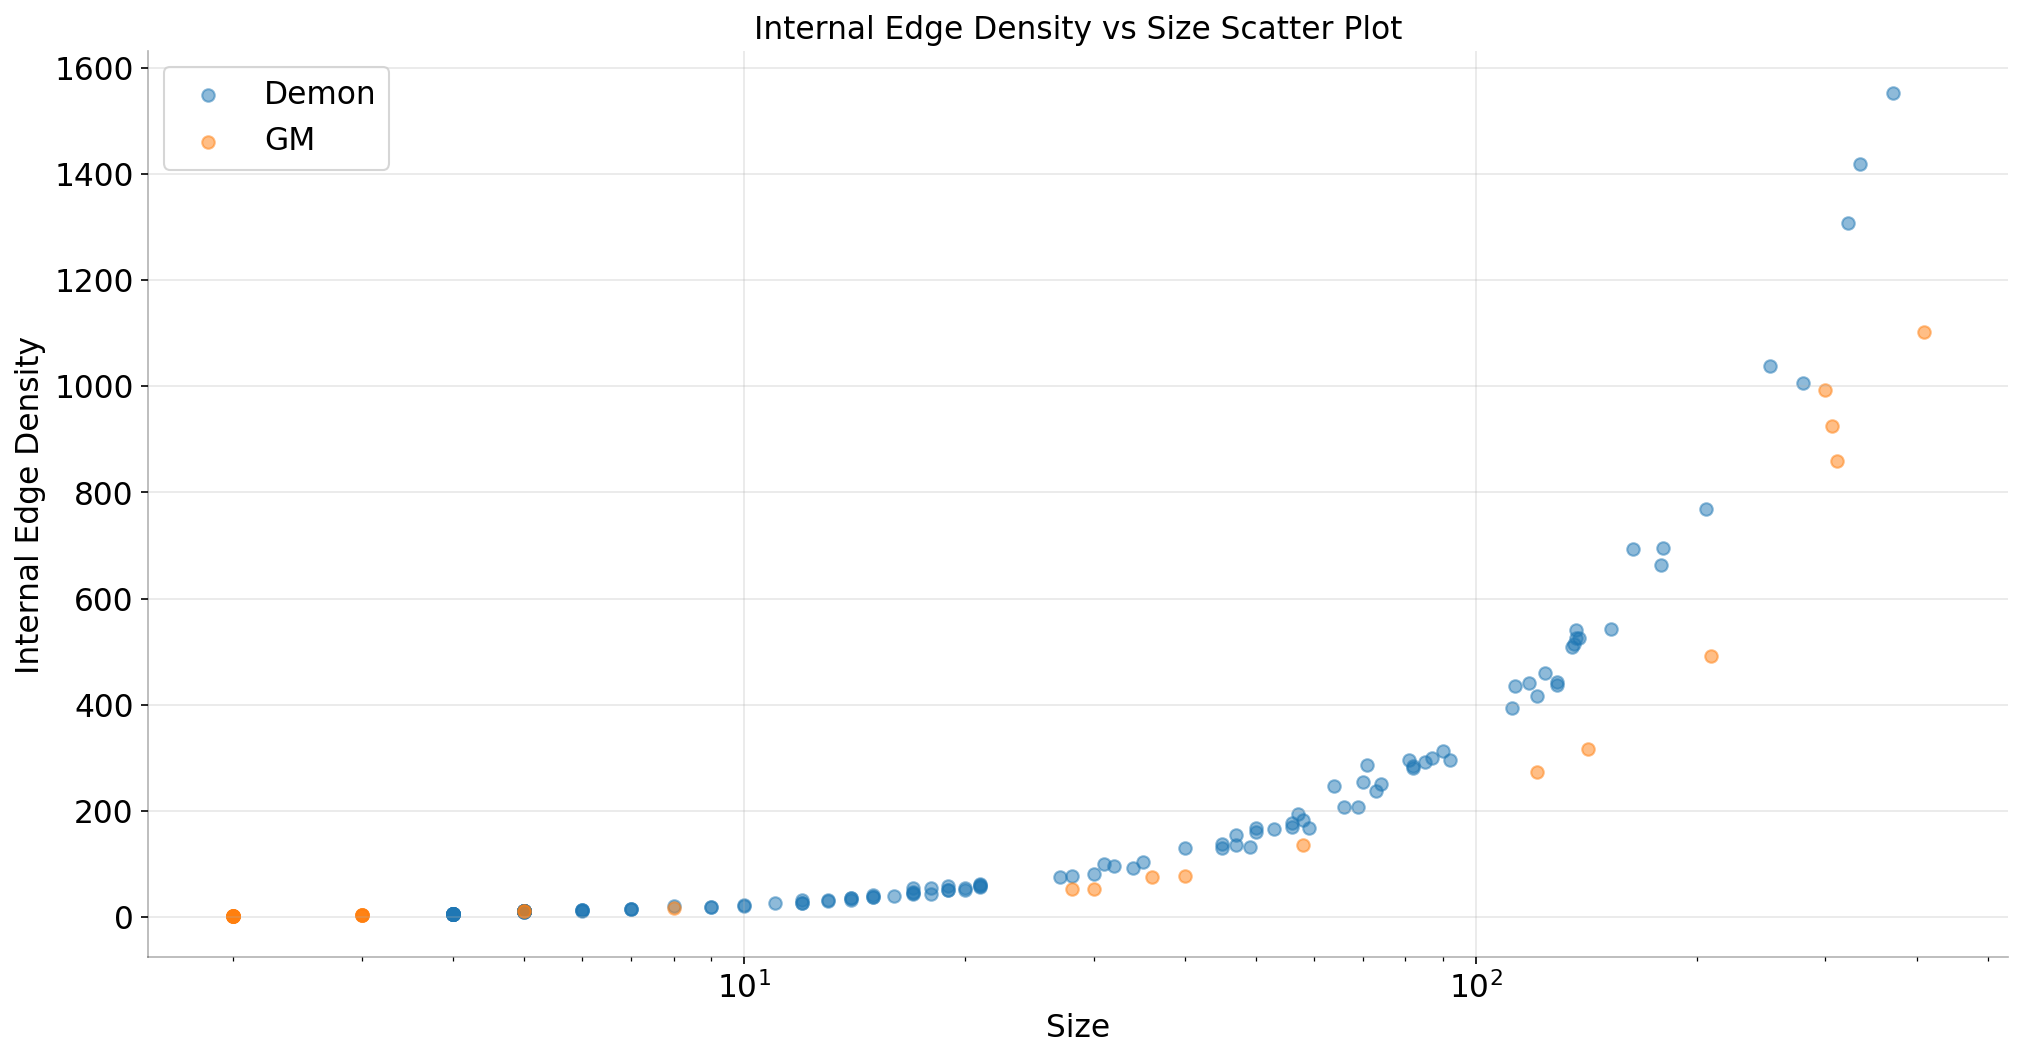

In [65]:
edge_density_= [(np.array(evaluation.size(G,demon_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                               "Demon"),
                               (np.array(evaluation.size(G,GM_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,GM_coms, summary=False)),
                                "GM")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

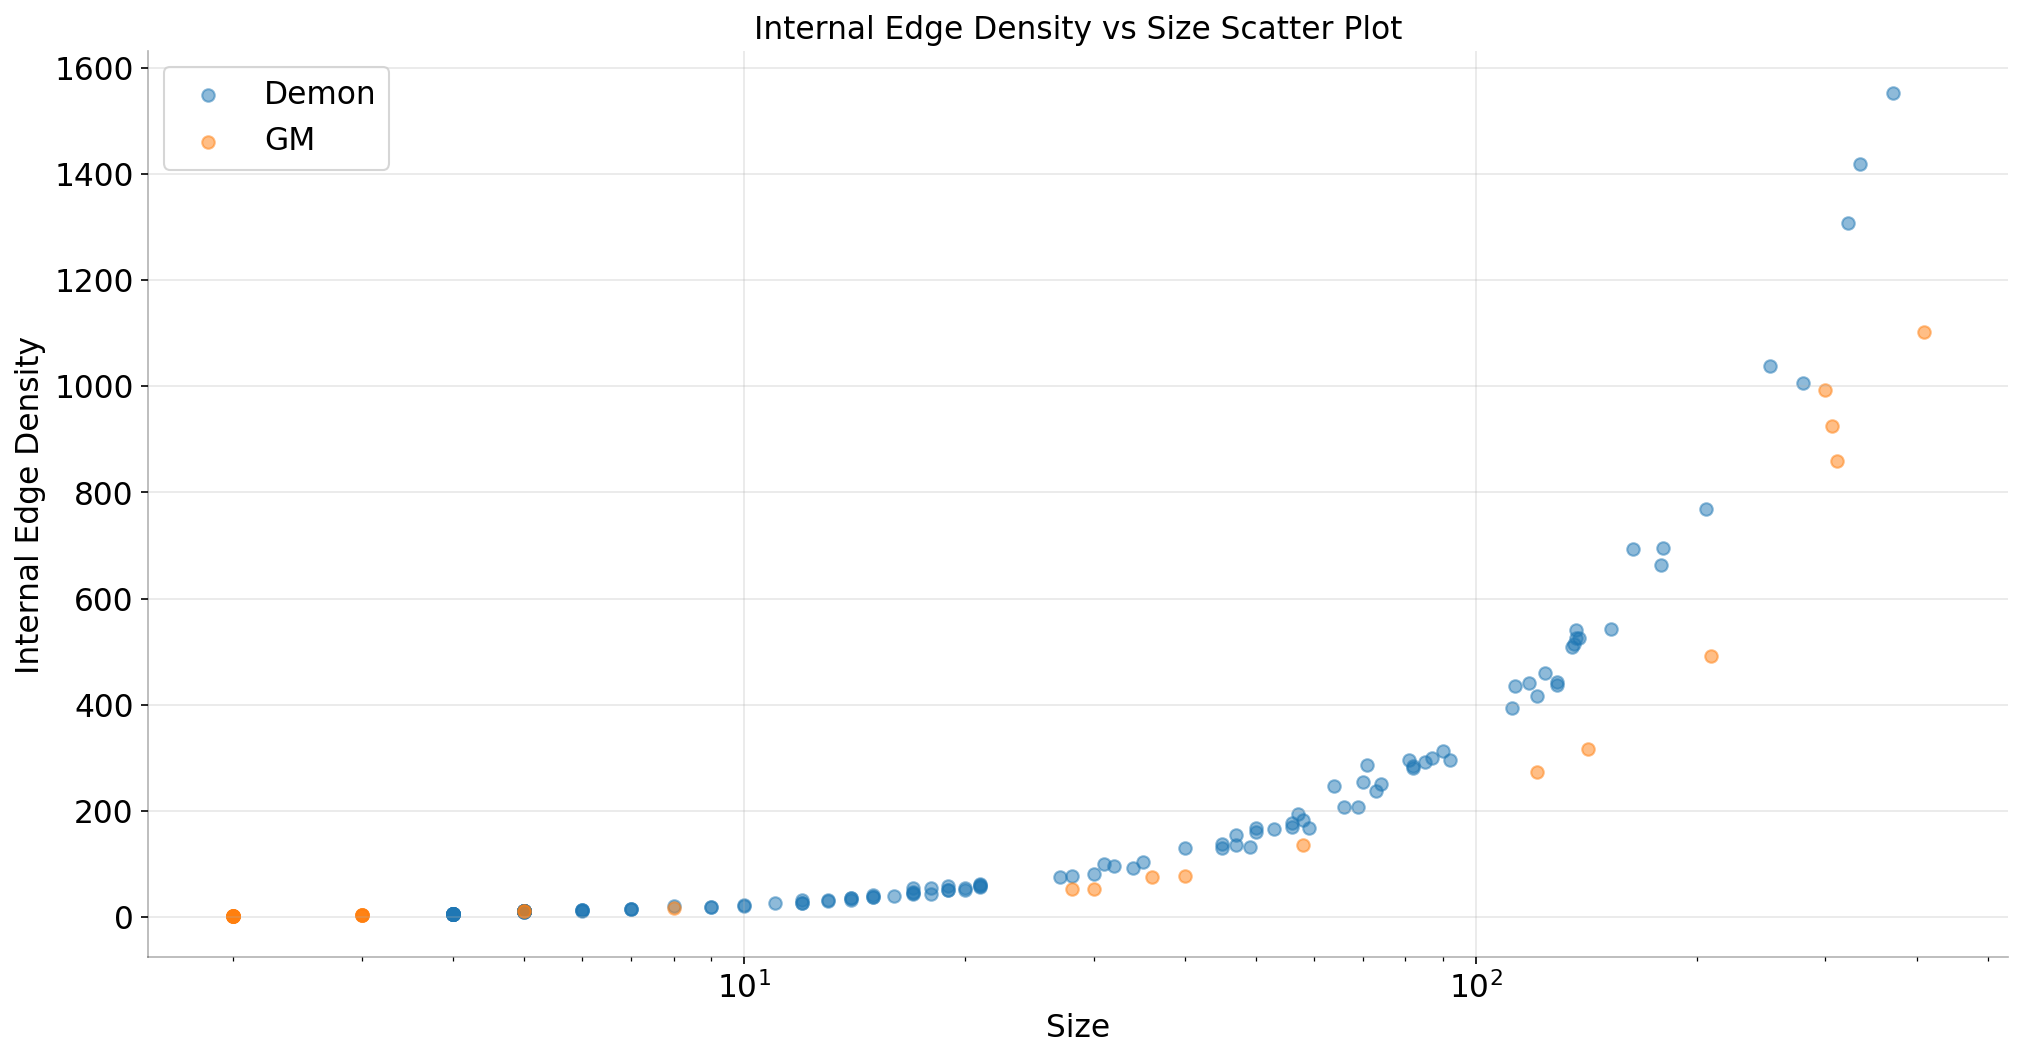

In [66]:
edge_density_= [(np.array(evaluation.size(G,demon_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                               "Demon"),
                               (np.array(evaluation.size(G,GM_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,GM_coms, summary=False)),
                                "GM")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

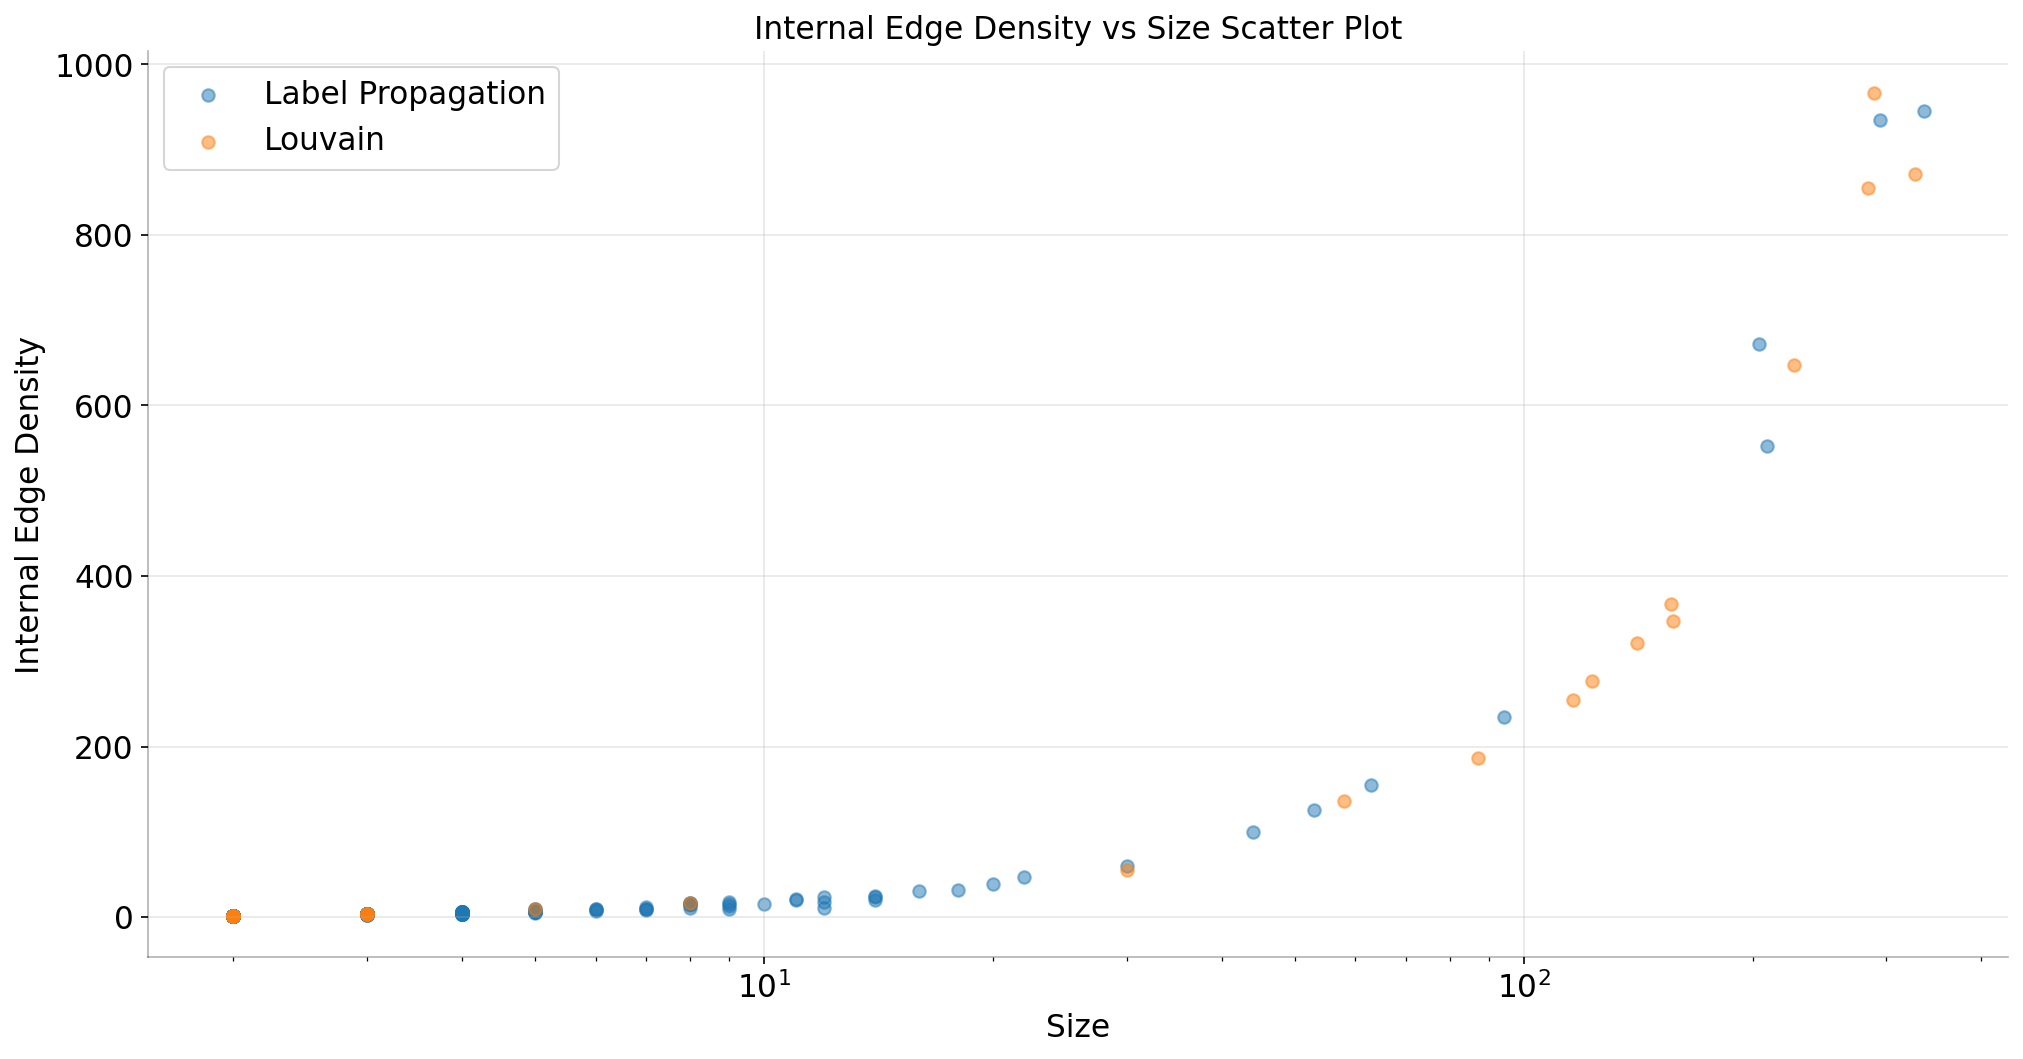

In [67]:
edge_density_ = [(np.array(evaluation.size(G,labelprop_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)),
                               "Label Propagation"),
                               (np.array(evaluation.size(G,louvain_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,louvain_coms, summary=False)),
                                "Louvain")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

In [68]:
plot_list = [ np.array(evaluation.size(G,louvain_coms, summary=False)), 
             np.array(evaluation.size(G,labelprop_coms, summary=False)),
             np.array(evaluation.size(G,demon_coms, summary=False)),
             np.array(evaluation.size(G,GM_coms, summary=False))]

In [69]:
(np.array(evaluation.size(G,labelprop_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)))

(array([336, 294, 209, 204,  94,  63,  53,  44,  30,  22,  20,  18,  16,
         14,  14,  14,  12,  12,  12,  11,  11,  10,   9,   9,   9,   9,
          8,   8,   8,   8,   8,   8,   7,   7,   7,   7,   6,   6,   6,
          6,   5,   5,   5,   5,   5,   5,   5,   5,   4,   4,   4,   4,
          4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4,   4,   4,   4,   4,   4,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   2,
          2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   2]),
 

In [70]:
edge_density_all= [(np.array(evaluation.size(G,labelprop_coms, summary=False)), np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)), "Label Propagation"),
                       (np.array(evaluation.size(G,louvain_coms, summary=False)), np.array(evaluation.edges_inside(G,louvain_coms, summary=False)), "Louvain"),
                      (np.array(evaluation.size(G,demon_coms, summary=False)), np.array(evaluation.edges_inside(G,demon_coms, summary=False)), "Demon"),
                       (np.array(evaluation.size(G,GM_coms, summary=False)), np.array(evaluation.edges_inside(G,GM_coms, summary=False)), "GM"),]

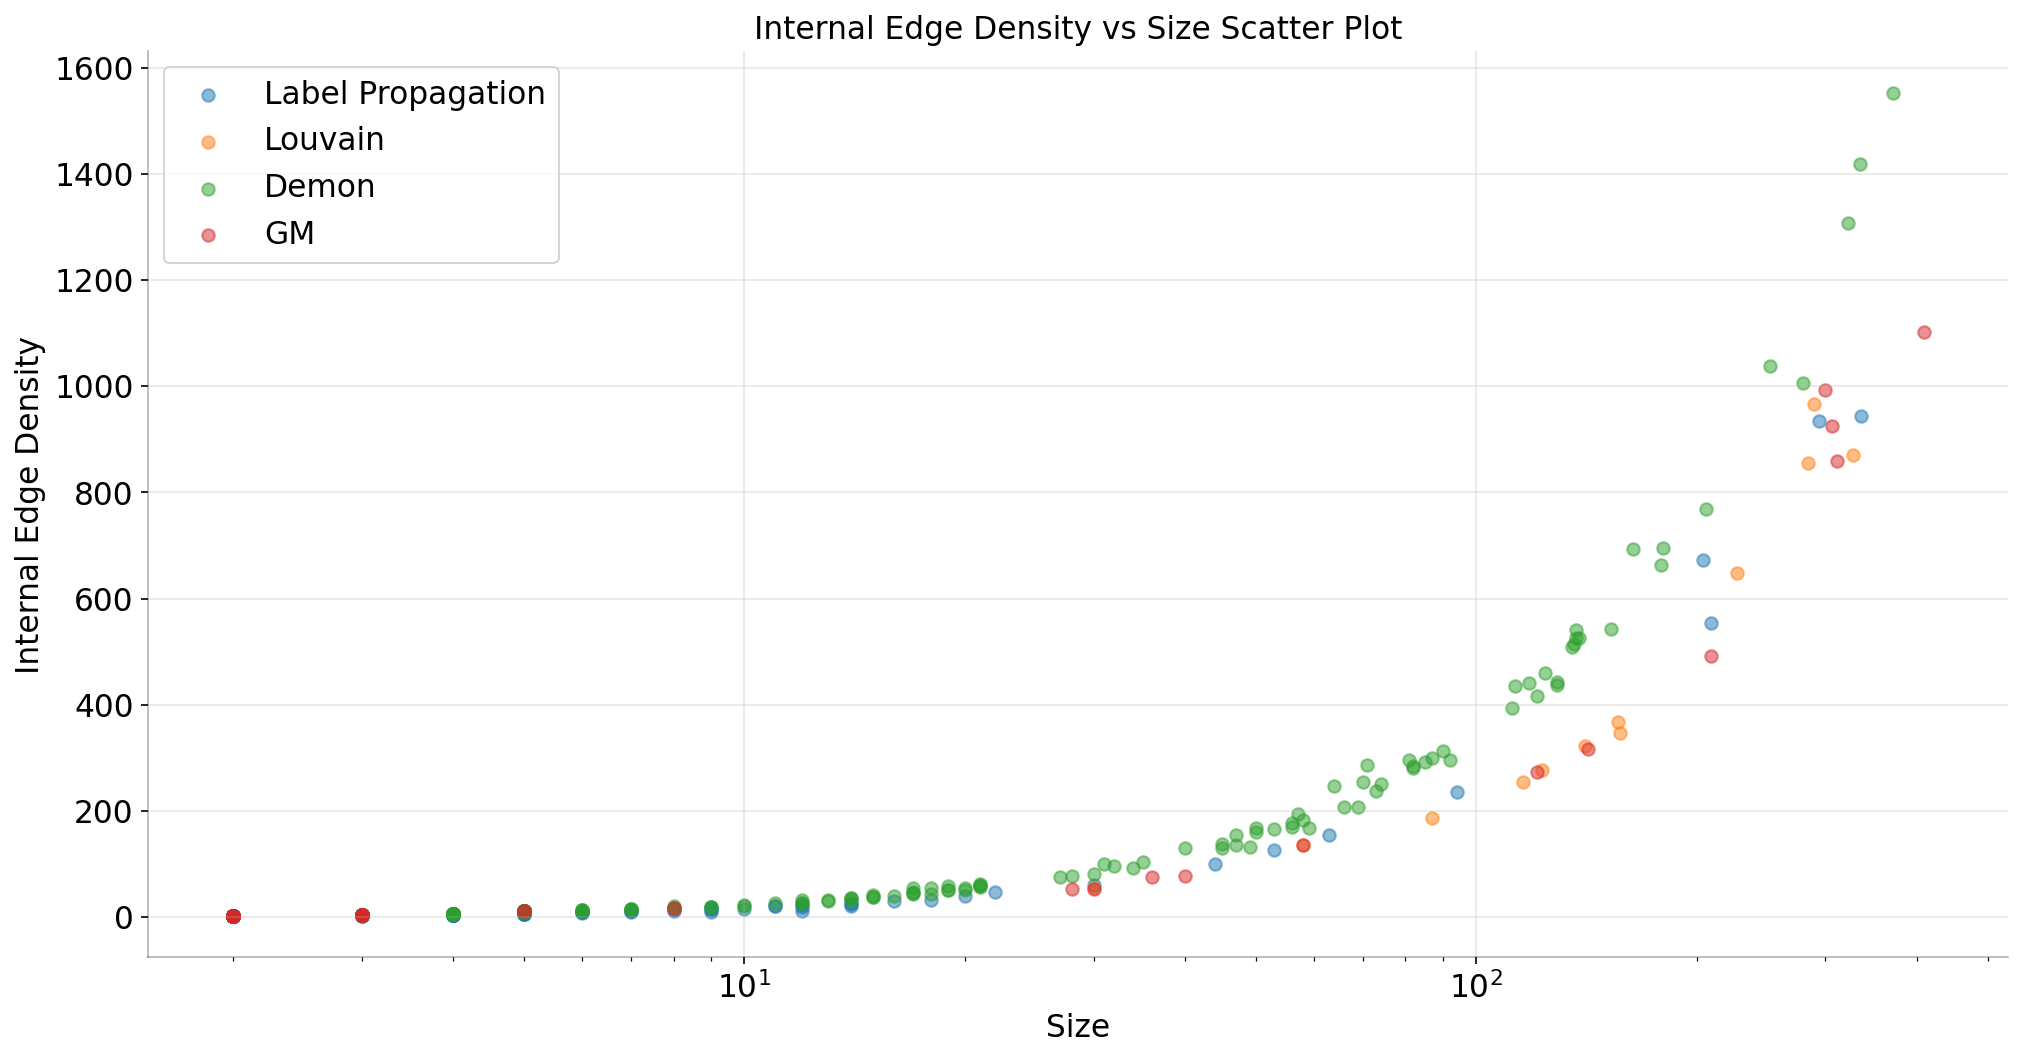

In [71]:
scatter_plot(edge_density_all, "Internal Edge Density vs Size")

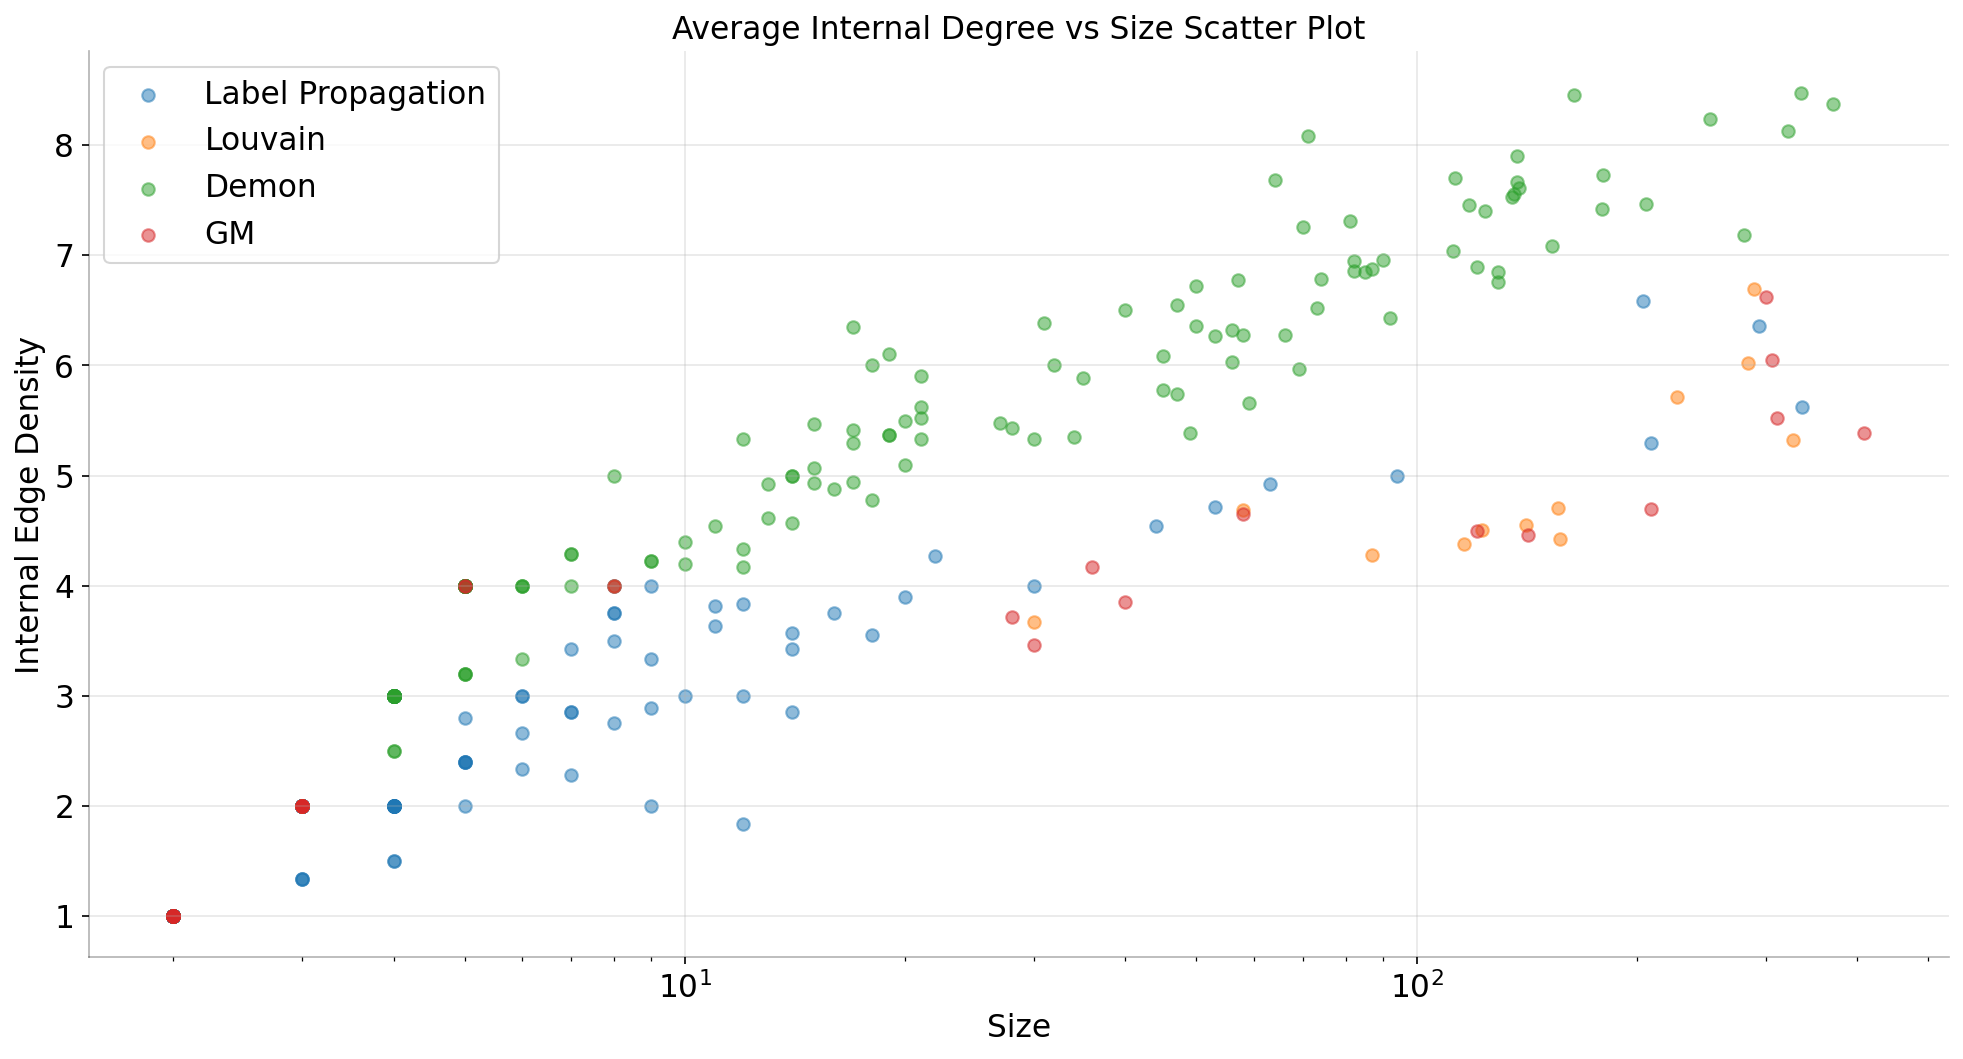

In [72]:
avg_deg_all= [(np.array(evaluation.size(G,labelprop_coms, summary=False)), np.array(evaluation.average_internal_degree(G,labelprop_coms, summary=False)), "Label Propagation"),
                       (np.array(evaluation.size(G,louvain_coms, summary=False)), np.array(evaluation.average_internal_degree(G,louvain_coms, summary=False)), "Louvain"),
                      (np.array(evaluation.size(G,demon_coms, summary=False)), np.array(evaluation.average_internal_degree(G,demon_coms, summary=False)), "Demon"),
                       (np.array(evaluation.size(G,GM_coms, summary=False)), np.array(evaluation.average_internal_degree(G,GM_coms, summary=False)), "GM"),]
scatter_plot(avg_deg_all, "Average Internal Degree vs Size")

3) Comparison NMI, NF1

In [73]:
#Non di Demon (e in caso di Kclique se si riesce a fare) perchè non copre tutto il dataset ed è overlapping
def comparison_NMI(coms1, coms2, name):
    print(f"{name}: ",evaluation.normalized_mutual_information(coms1, coms2))  
    print("********")

In [74]:
def comparison_NF1(coms1, coms2, name):
    print(f"{name}: ",evaluation.nf1(coms1, coms2))
    coms1_tuple = [tuple(x) for x in coms1.communities]
    coms2_tuple = [tuple(x) for x in coms2.communities]
    nf = NF1(coms1_tuple,coms2_tuple)
    results = nf.summary()
    print(results['scores'])
    print(results['details'])
    nf.plot(title=f'{name}')
    print("*********")

NMI

In [75]:
comparison_NMI(louvain_coms, labelprop_coms, "Louvain vs Label")
comparison_NMI(GM_coms, labelprop_coms, "GM vs Label")
comparison_NMI(louvain_coms, GM_coms, "Louvain vs GM")

Louvain vs Label:  MatchingResult(score=0.6243703419567883, std=None)
********
GM vs Label:  MatchingResult(score=0.6228254518113512, std=None)
********
Louvain vs GM:  MatchingResult(score=0.776251647427689, std=None)
********


NF1

Louvain vs Label Propagation:  MatchingResult(score=0.08302793151158767, std=None)
                               Value
Index                               
Ground Truth Communities  177.000000
Identified Communities     28.000000
Community Ratio             0.158192
Ground Truth Matched        0.129944
Node Coverage               1.000000
NF1                         0.083028
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0    0.08     1.0  0.777857      1.0  0.309543


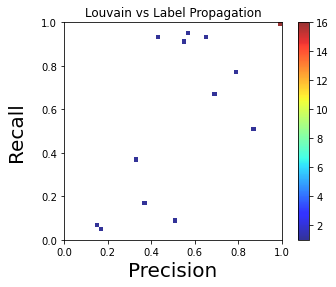

*********
GM vs Label:  MatchingResult(score=0.10440382380405354, std=None)
                               Value
Index                               
Ground Truth Communities  177.000000
Identified Communities     29.000000
Community Ratio             0.163842
Ground Truth Matched        0.146893
Node Coverage               1.000000
NF1                         0.104404
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.1     1.0  0.792759      1.0  0.284216


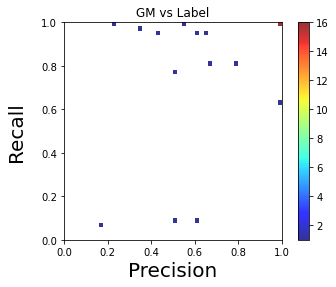

*********
Louvain vs GM:  MatchingResult(score=0.6844871569317381, std=None)
                              Value
Index                              
Ground Truth Communities  29.000000
Identified Communities    28.000000
Community Ratio            0.965517
Ground Truth Matched       0.862069
Node Coverage              1.000000
NF1                        0.684487
   F1 min  F1 max   F1 mean  F1 mode   F1 std
0    0.32     1.0  0.889286      1.0  0.19563


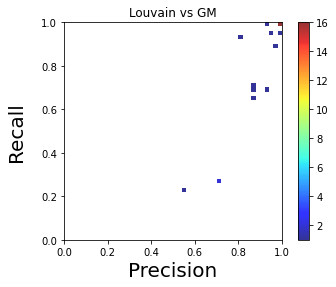

*********
Louvain vs Demon:  MatchingResult(score=0.01729981801637853, std=None)
                               Value
Index                               
Ground Truth Communities  157.000000
Identified Communities     28.000000
Community Ratio             0.178344
Ground Truth Matched        0.082803
Node Coverage               1.143417
NF1                         0.017300
   F1 min  F1 max  F1 mean  F1 mode   F1 std
0    0.17     1.0     0.45     0.17  0.22194


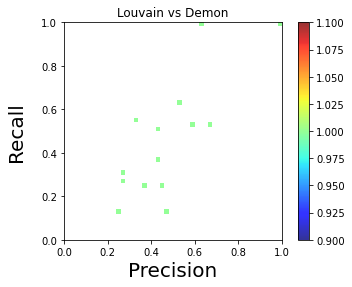

*********
GM vs Demon:  MatchingResult(score=0.021323376528296356, std=None)
                               Value
Index                               
Ground Truth Communities  157.000000
Identified Communities     29.000000
Community Ratio             0.184713
Ground Truth Matched        0.089172
Node Coverage               1.143417
NF1                         0.021323
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0    0.14     1.0  0.495333      1.0  0.254529


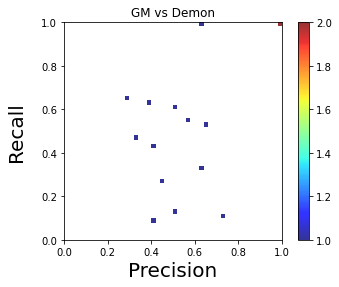

*********
Label Propagation vs Demon:  MatchingResult(score=0.10293487145478941, std=None)
                               Value
Index                               
Ground Truth Communities  157.000000
Identified Communities    177.000000
Community Ratio             1.127389
Ground Truth Matched        0.687898
Node Coverage               1.143417
NF1                         0.102935
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0    0.01     1.0  0.245238     0.02  0.301454


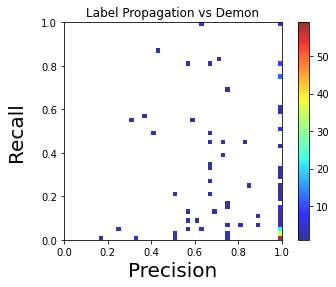

*********


In [76]:
comparison_NF1(louvain_coms, labelprop_coms, "Louvain vs Label Propagation")
comparison_NF1(GM_coms, labelprop_coms, "GM vs Label")
comparison_NF1(louvain_coms, GM_coms, "Louvain vs GM")

comparison_NF1(louvain_coms, demon_coms, "Louvain vs Demon")
comparison_NF1(GM_coms, demon_coms, "GM vs Demon")
comparison_NF1(labelprop_coms, demon_coms, "Label Propagation vs Demon")

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

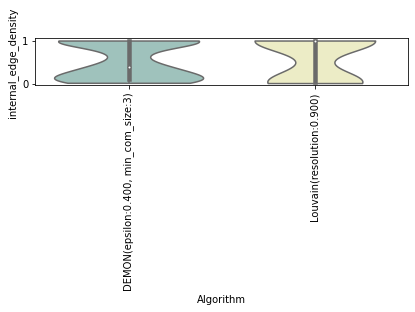

In [77]:
viz.plot_com_stat([demon_coms, louvain_coms], evaluation.internal_edge_density)

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

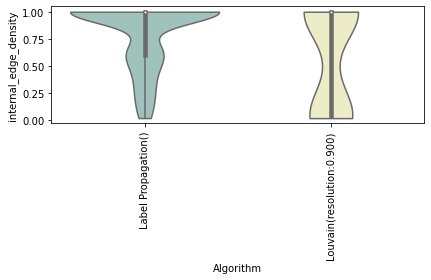

In [78]:
viz.plot_com_stat([labelprop_coms, louvain_coms], evaluation.internal_edge_density)

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

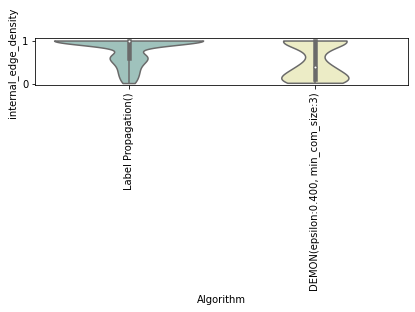

In [79]:
viz.plot_com_stat([labelprop_coms, demon_coms], evaluation.internal_edge_density)

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

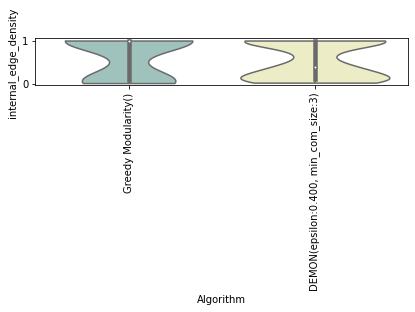

In [80]:
viz.plot_com_stat([GM_coms, demon_coms], evaluation.internal_edge_density)

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

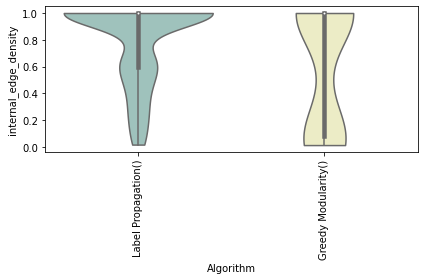

In [81]:
viz.plot_com_stat([labelprop_coms, GM_coms], evaluation.internal_edge_density)

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

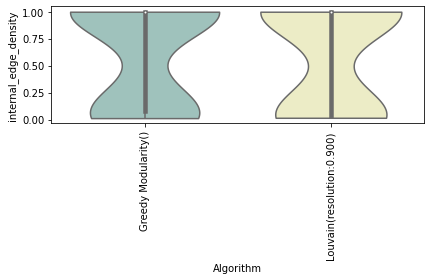

In [82]:
viz.plot_com_stat([GM_coms, louvain_coms], evaluation.internal_edge_density)

# 6 - Prova Kcliques

In [85]:
import random
k = 2000
sampled_nodes = random.sample(G.nodes, k)
sampled_graph = G.subgraph(sampled_nodes)
k_num = ensemble.Parameter(name="k", start=2, end=8, step=1)

k_coms, scoring = ensemble.random_search(graph=sampled_graph, method=algorithms.kclique,
                                                       parameters=[k_num],
                                                       quality_score=evaluation.newman_girvan_modularity,
                                                       instances=3, aggregate=max)

In [86]:
with open(community_path+'k.pickle', 'wb') as f:
    pickle.dump(k_coms, f)

In [87]:
with open(community_path+'k.pickle', 'rb') as f:
    k_coms = pickle.load(f)

In [88]:
print(print_bold_str("Average Internal Degree:"), k_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), k_coms.internal_edge_density())
print(print_bold_str("Conductance:"), k_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), k_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), k_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), k_coms.modularity_density())
print(print_bold_str("Z Modularity:"), k_coms.z_modularity())

Average Internal Degree: FitnessResult(min=4.0, max=10.896103896103897, score=4.139542342512639, std=0.6287605893510824)
Internal Edge Density: FitnessResult(min=0.07121636533401239, max=1.0, score=0.9820734865713118, std=0.08907434564955068)
Conductance: FitnessResult(min=0.16666666666666666, max=0.9752168525402726, score=0.8689796655319688, std=0.12818095983754785)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.6598877907871845, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.1297200921894041, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=-12767.819090631594, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=0.8604023727530675, std=None)


In [89]:
print(print_bold_str("N_Community:"), len(k_coms.communities))

max_com_len = 0
for com in k_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)   

N_Community: 303
Max_Dim_Community: 154


In [90]:
k_tuple = [tuple(x) for x in k_coms.communities]

{'154': 1, '48': 1, '26': 1, '12': 1, '10': 1, '9': 2, '7': 5, '6': 17, '5': 274}


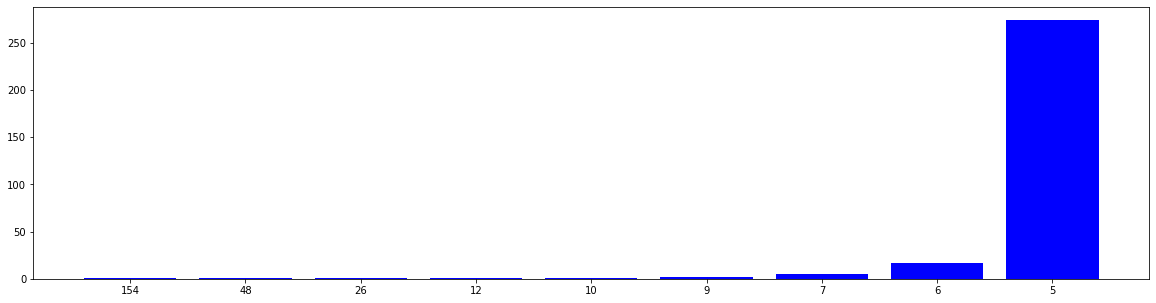

In [91]:
plot_communities_dimentions(k_tuple)

In [92]:
covg_overlap(sampled_graph, k_coms, "K-Cliques")

K-Cliques coverage: 0.497
K-Cliques overlap: True
K-Cliques avg degree: FitnessResult(min=4.0, max=10.896103896103897, score=4.139542342512639, std=0.6287605893510824)
*******


# 7 - Analisi delle communities di Louvain

1) Prova edit distance con supervisione tag

In [93]:
from collections import Counter
from wordcloud import WordCloud

In [94]:
saved_path2 = "/Users/damon/Desktop/Dessertion/2-Network Analysis/nodes_tagged_by_language.csv"

In [95]:
tagged_dg = pd.read_csv(saved_path2)

In [96]:
s_tag = tagged_dg[tagged_dg["Named"]!="unamed"][["Id", "Named"]]
s_tag

Id                      Named
0                     python      Python & R Developers
1                        c++               C Developers
2                 javascript  Android & Java Developers
3                    android  Android & Java Developers
4                       java  Android & Java Developers
...                      ...                        ...
2005               wordpress        FrontEnd Developers
2006            android-view  Android & Java Developers
2011  computation-expression        FrontEnd Developers
2020                  oracle        Database Developers
2028              aws-sdk-js        FrontEnd Developers

[434 rows x 2 columns]

In [97]:
def edit_distance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

In [98]:
dd = {}

In [99]:
categories_list = []
for s in louvain_coms.communities[1]:
    category = ""
    maxmax_ = 30
    for n in set(s_tag["Named"]):
        to_check = list(s_tag[s_tag["Named"]==n]["Id"])
        max_ = 30
        for ss in to_check:
            edit = edit_distance(s, ss)
            if  edit < max_:
                max_ = edit
        if max_ < maxmax_:
            maxmax_ = max_
            category = n
    categories_list.append(category)

In [100]:
new_new_df = pd.DataFrame({"Com_1": categories_list})
new_new_df.to_csv(community_path + "Com_1.csv", index=False)

In [101]:
dd[1]=categories_list

In [102]:
dd[1]

['C Developers',
 'FrontEnd Developers',
 'C Developers',
 'FrontEnd Developers',
 'FrontEnd Developers',
 'C Developers',
 'Database Developers',
 'C Developers',
 'Python & R Developers',
 'C Developers',
 'FrontEnd Developers',
 'C Developers',
 'Android & Java Developers',
 'Android & Java Developers',
 'FrontEnd Developers',
 'FrontEnd Developers',
 'FrontEnd Developers',
 'FrontEnd Developers',
 'FrontEnd Developers',
 'FrontEnd Developers',
 'Version Control',
 'C Developers',
 'Android & Java Developers',
 'FrontEnd Developers',
 'Version Control',
 'FrontEnd Developers',
 'C Developers',
 'Version Control',
 'FrontEnd Developers',
 'FrontEnd Developers',
 'FrontEnd Developers',
 'FrontEnd Developers',
 'Android & Java Developers',
 'FrontEnd Developers',
 'FrontEnd Developers',
 'C Developers',
 'Python & R Developers',
 'C Developers',
 'FrontEnd Developers',
 'Android & Java Developers',
 'FrontEnd Developers',
 'Database Developers',
 'FrontEnd Developers',
 'Python & R Dev

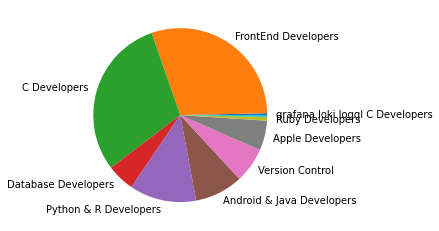

In [105]:
import matplotlib.pyplot as pyplot

for s in dd[1]:
    all_string = all_string + s + "_"
word_could_dict=Counter(all_string.split("_"))
pyplot.pie([float(v) for v in word_could_dict.values()], labels=[k for k in word_could_dict],
           autopct=None)
pyplot.show()

2) Prova word cloud

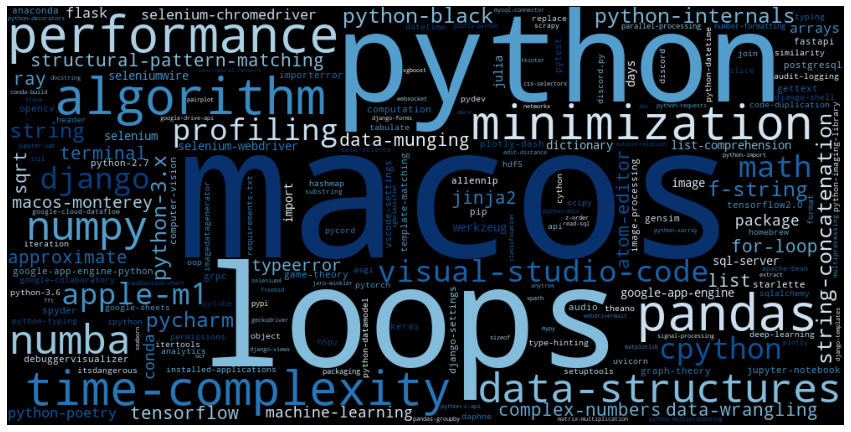

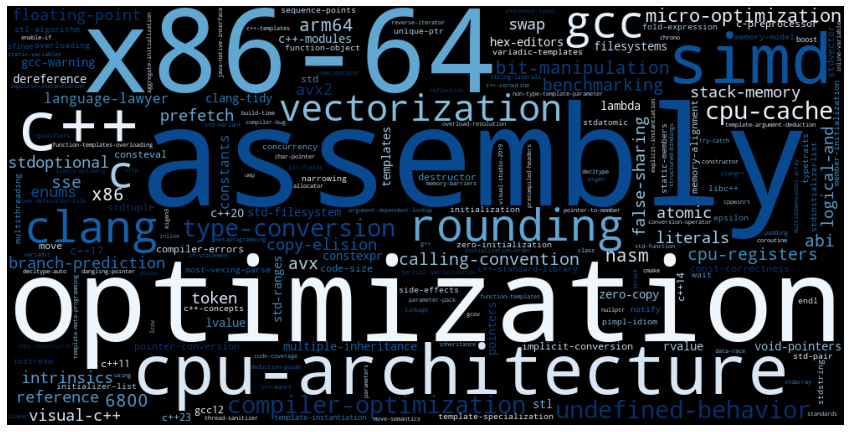

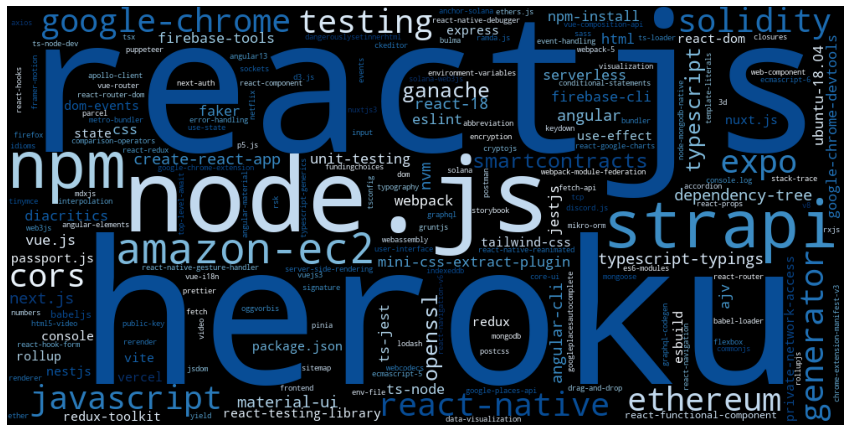

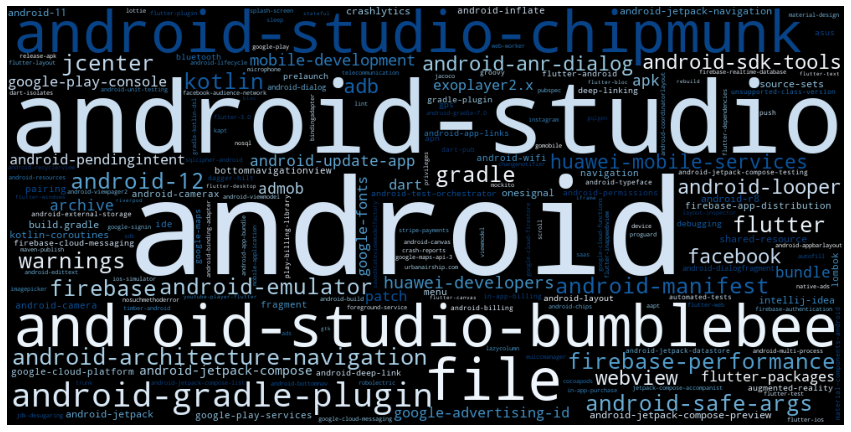

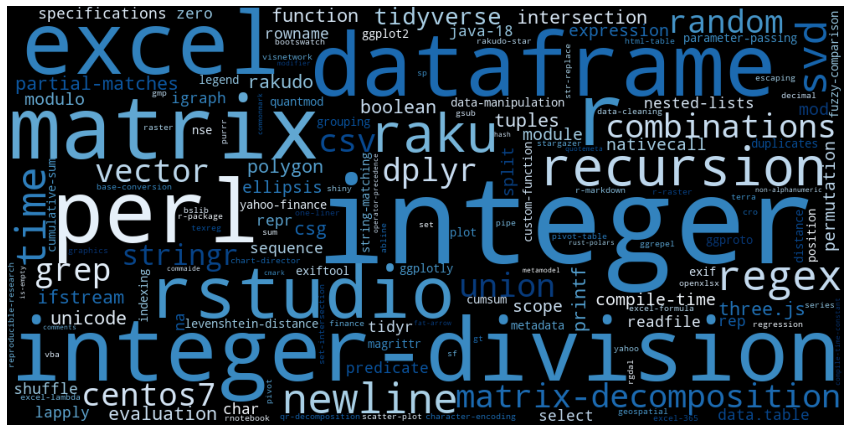

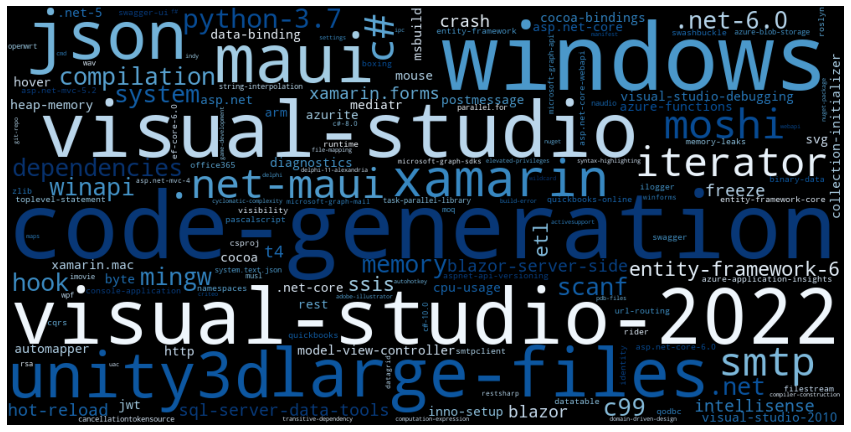

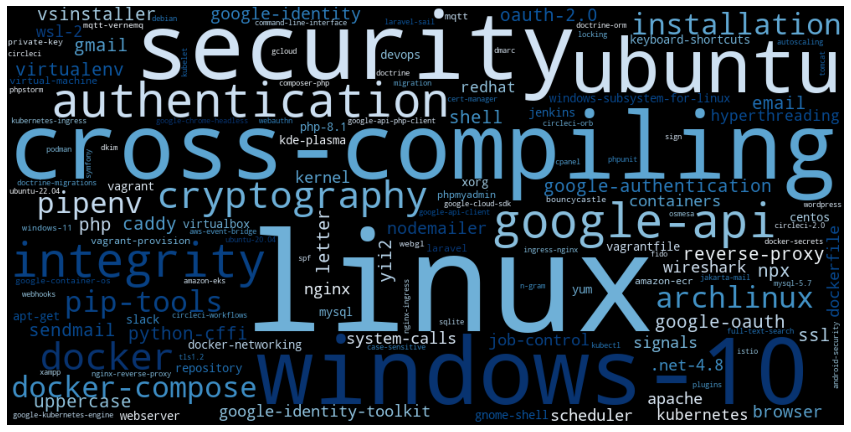

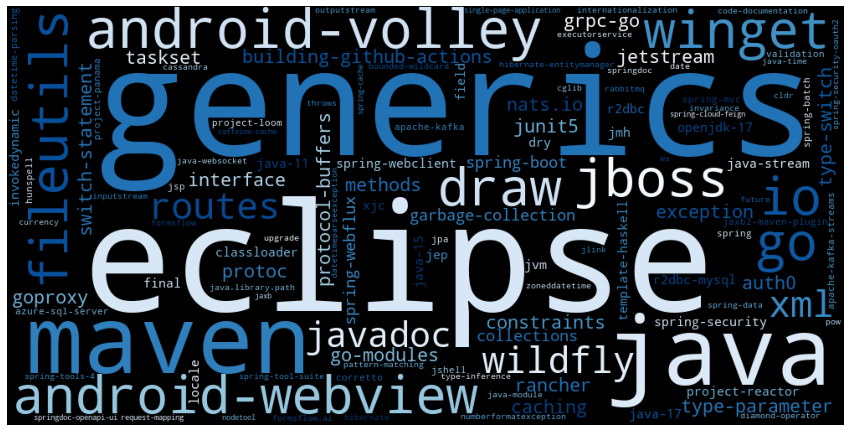

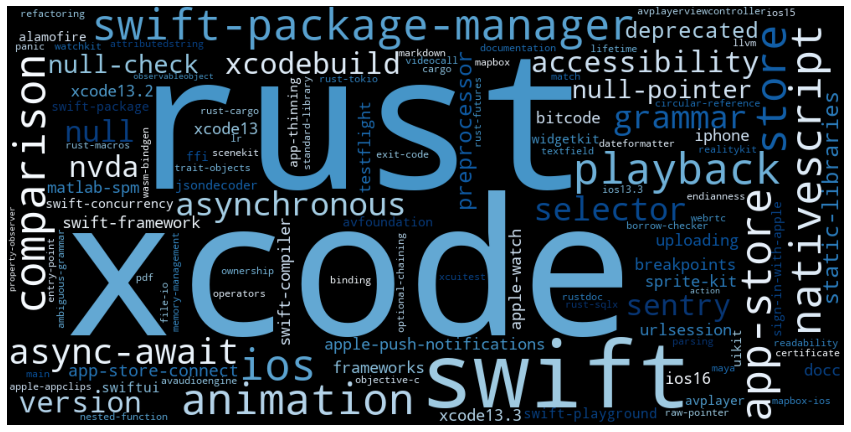

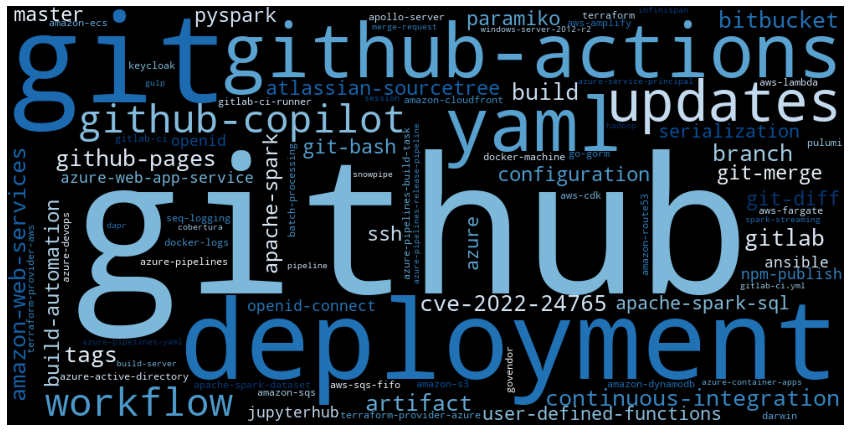

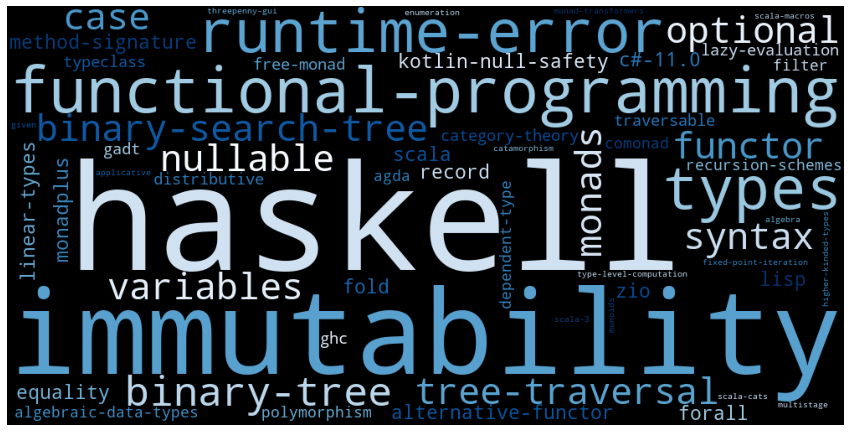

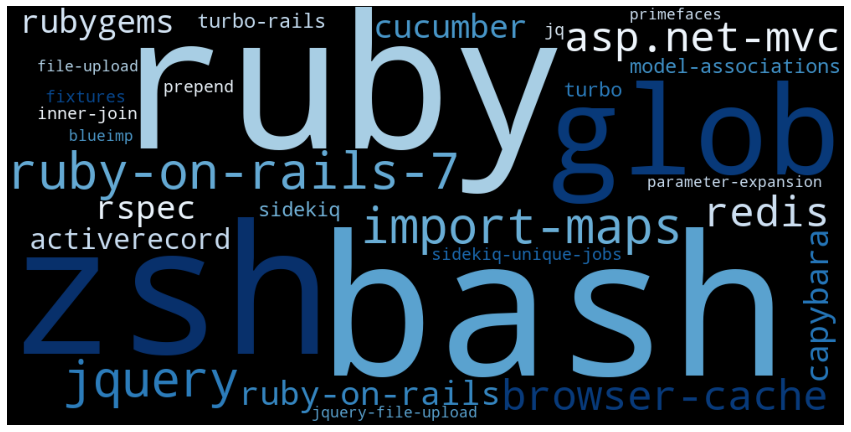

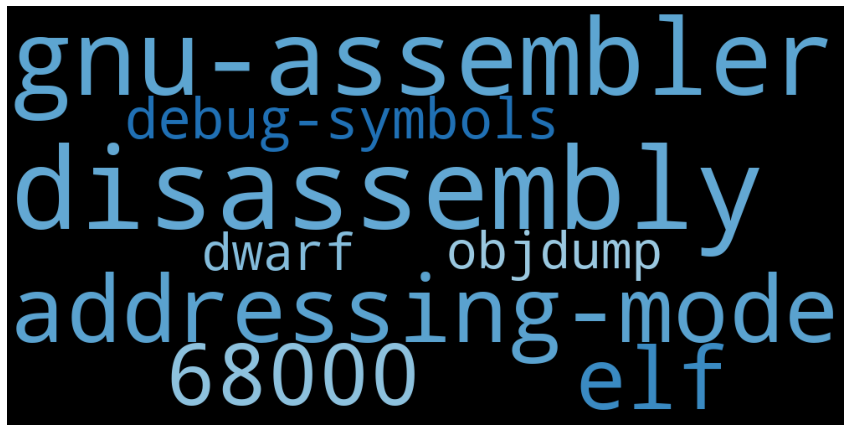

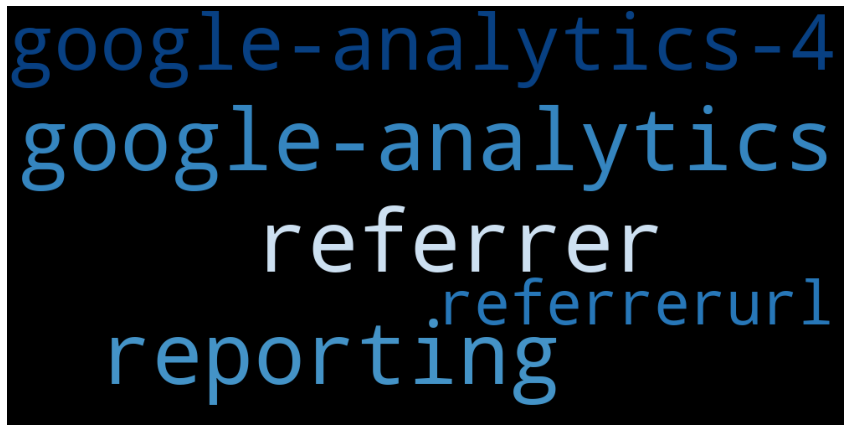

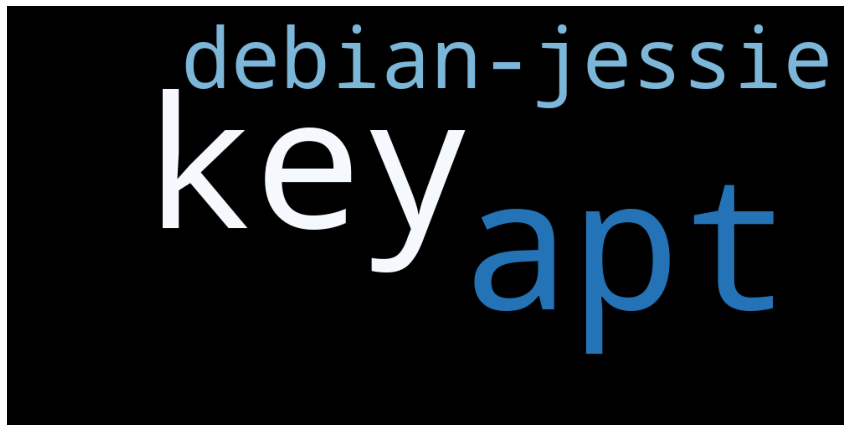

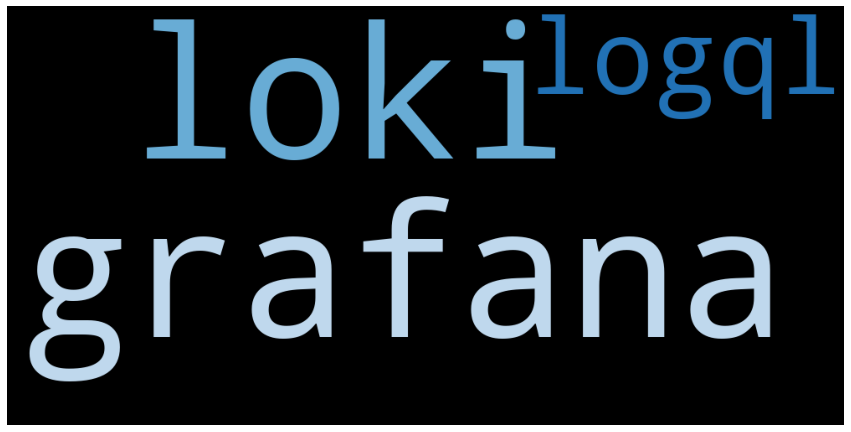

In [104]:
for i in louvain_coms.communities[:16]:
    all_string = ""
    for s in i:
        all_string = all_string + s + " "
    word_could_dict=Counter(all_string.split())
    wordcloud = WordCloud(width = 1000, height = 500 , colormap="Blues").generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.close()

In [ ]:
#0: react, node, frontend
#1: python, julia, learning
#2: C development
#3: version control
#4: deployment

# Analisi delle community Demon

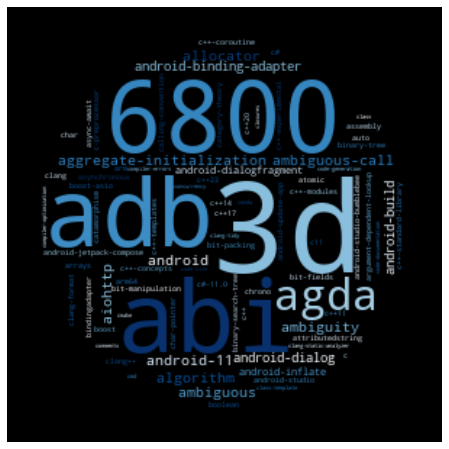

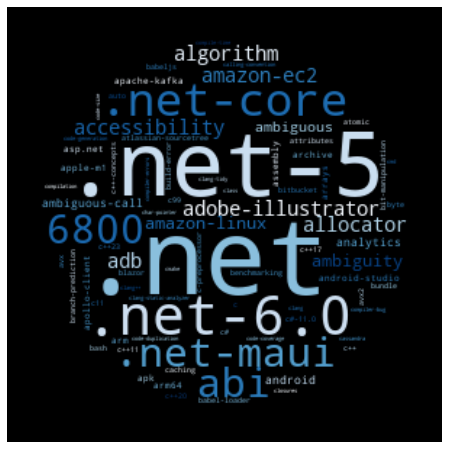

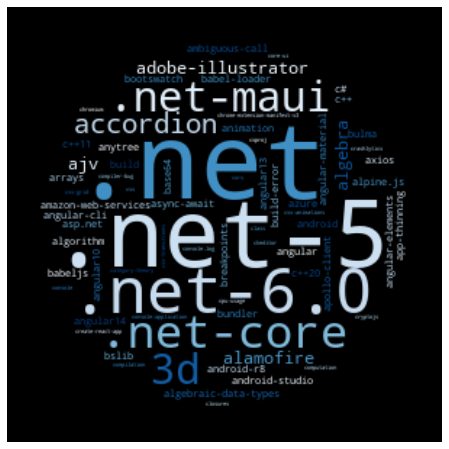

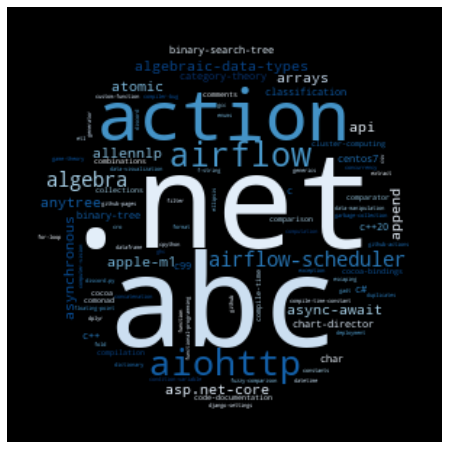

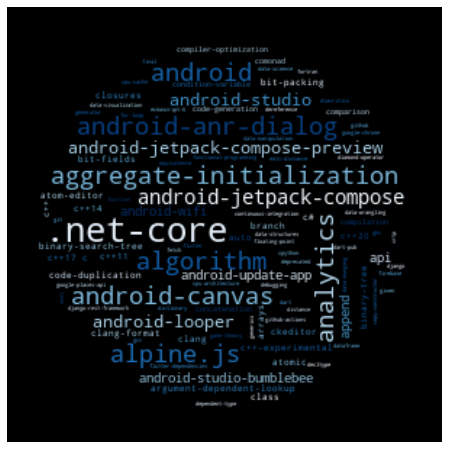

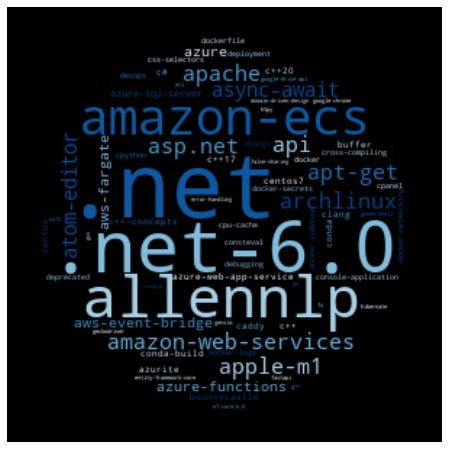

In [106]:
for i in demon_coms.communities[:6]:
    all_string = ""
    for s in i:
        all_string = all_string + s + " "
    
    word_could_dict=Counter(all_string.split())
    """
    wordcloud = WordCloud(width = 1000, height = 500 , colormap="Blues").generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.close()
    """
    
    # makes the circle using numpy
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    # Generate a word cloud of document
    wordcloud = WordCloud(mask=mask, contour_width=0.1, colormap="Blues").generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    #Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()